# Introduction
Real-world data rarely comes clean. Using Python and its libraries, you will gather data from a variety of sources and in a variety of formats, assess its quality and tidiness, then clean it. This is called data wrangling. You will document your wrangling efforts in a Jupyter Notebook, plus showcase them through analyses and visualizations using Python (and its libraries) and/or SQL.

The dataset that you will be wrangling (and analyzing and visualizing) is the tweet archive of Twitter user @dog_rates, also known as WeRateDogs. WeRateDogs is a Twitter account that rates people's dogs with a humorous comment about the dog. These ratings almost always have a denominator of 10. The numerators, though? Almost always greater than 10. 11/10, 12/10, 13/10, etc. Why? Because "they're good dogs Brent." WeRateDogs has over 4 million followers and has received international media coverage.

WeRateDogs downloaded their Twitter archive and sent it to Udacity via email exclusively for you to use in this project. This archive contains basic tweet data (tweet ID, timestamp, text, etc.) for all 5000+ of their tweets as they stood on August 1, 2017. More on this soon.

## Project Steps Overview
Your tasks in this project are as follows:

Step 1: Gathering data

Step 2: Assessing data

Step 3: Cleaning data

Step 4: Storing data

Step 5: Analyzing, and visualizing data

Step 6: Reporting

your data wrangling efforts
your data analyses and visualizations

## Project Motivation
### Context
Your goal: wrangle WeRateDogs Twitter data to create interesting and trustworthy analyses and visualizations. The Twitter archive is great, but it only contains very basic tweet information. Additional gathering, then assessing and cleaning is required for "Wow!"-worthy analyses and visualizations.

## The Data
In this project, you will work on the following three datasets.

### Enhanced Twitter Archive

The WeRateDogs Twitter archive contains basic tweet data for all 5000+ of their tweets, but not everything. One column the archive does contain though: each tweet's text, which I used to extract rating, dog name, and dog "stage" (i.e. doggo, floofer, pupper, and puppo) to make this Twitter archive "enhanced." Of the 5000+ tweets, I have filtered for tweets with ratings only (there are 2356).

### Additional Data via the Twitter API

Back to the basic-ness of Twitter archives: retweet count and favorite count are two of the notable column omissions. Fortunately, this additional data can be gathered by anyone from Twitter's API. Well, "anyone" who has access to data for the 3000 most recent tweets, at least. But you, because you have the WeRateDogs Twitter archive and specifically the tweet IDs within it, can gather this data for all 5000+. And guess what? You're going to query Twitter's API to gather this valuable data.

### Image Predictions File

One more cool thing: I ran every image in the WeRateDogs Twitter archive through a neural network that can classify breeds of dogs*. The results: a table full of image predictions (the top three only) alongside each tweet ID, image URL, and the image number that corresponded to the most confident prediction (numbered 1 to 4 since tweets can have up to four images).

So for the last row in that table:

- tweet_id is the last part of the tweet URL after "status/" → https://twitter.com/dog_rates/status/889531135344209921
- p1 is the algorithm's #1 prediction for the image in the tweet → golden retriever
- p1_conf is how confident the algorithm is in its #1 prediction → 95%
- p1_dog is whether or not the #1 prediction is a breed of dog → TRUE
- p2 is the algorithm's second most likely prediction → Labrador retriever
- p2_conf is how confident the algorithm is in its #2 prediction → 1%
- p2_dog is whether or not the #2 prediction is a breed of dog → TRUE
etc.

And the #1 prediction for the image in that tweet was spot on:

## Step 1: Gathering Data
In this step, you will gather all three pieces of data as described below in the "Data Gathering" section in the wrangle_act.ipynb notebook.

Note: the methods required to gather each data are different.

### The WeRateDogs Twitter archive
I am giving this file to you, so imagine it as a file on hand. Download this file manually by clicking the following link: twitter_archive_enhanced.csv. Once it is downloaded, upload it and read the data into a pandas DataFrame.

### The tweet image predictions
This file (image_predictions.tsv) is present in each tweet according to a neural network. It is hosted on Udacity's servers and should be downloaded programmatically using the Requests library and the following URL: https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv

### Additional data from the Twitter API
Gather each tweet's retweet count and favorite ("like") count at the minimum and any additional data you find interesting. Using the tweet IDs in the WeRateDogs Twitter archive, query the Twitter API for each tweet's JSON data using Python's Tweepy library and store each tweet's entire set of JSON data in a file called tweet_json.txt file.

Each tweet's JSON data should be written to its own line. Then read this .txt file line by line into a pandas DataFrame with (at minimum) tweet ID, retweet count, and favorite count. 

- Note: do not include your Twitter API keys, secrets, and tokens in your project submission.

In [1]:
# Install the tweepy package to enviroment.
pip install tweepy

In [3]:
# Import necessary packages 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tweepy
import itertools
import config # password storage
import os
import requests
import json
%matplotlib inline

### The WeRateDogs Twitter archive

In [4]:
# Manually downloaded and uploaded the csv file and read it into dataframeThe WeRateDogs Twitter archive 
twitter_archive_df = pd.read_csv('twitter_archive_enhanced.csv')

twitter_archive_enhanced.csv

In [5]:
twitter_archive_df.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


### The tweet image predictions

In [40]:
#Create the Request & Define the url and use the requests.get method

url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
response = requests.get(url)
response

<Response [200]>

In [8]:
# Downloading the tsv file
# open('image_predictions.tsv', 'wb').write(response.content)

335079

In [5]:
# Loading the the tsv file into dataframe.
image_predictions_df = pd.read_csv('image_predictions.tsv', sep='\t')

In [6]:
image_predictions_df.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


### Twitter API Data

In [43]:
# Authentication for Twitter

#consumer key
consumer_key = config.API_Key 
# consumer secret
consumer_secret = config.API_Secret 
 #acces token
access_token = config.Access_Token
#access secret
access_secret = config.Access_Token_Secret 

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

#
api = tweepy.API(auth, parser = tweepy.parsers.JSONParser(), wait_on_rate_limit = True)

# test authentication
try:
    api.verify_credentials()
    print("Authentication OK")
except:
    print("Error during authentication")
    

Authentication OK


Twitter API

In [44]:
# create a list of tweet_ids
tweet_IDs = twitter_archive_df['tweet_id']
tweet_IDs

0       892420643555336193
1       892177421306343426
2       891815181378084864
3       891689557279858688
4       891327558926688256
               ...        
2351    666049248165822465
2352    666044226329800704
2353    666033412701032449
2354    666029285002620928
2355    666020888022790149
Name: tweet_id, Length: 2356, dtype: int64

In [72]:
# Using the tweet IDs in the WeRateDogs Twitter archive, 
# Query the Twitter API for each tweet's JSON data using Python's Tweepy library 
# Create a file called tweet_json.txt file and store each tweet's entire set of JSON data in the file

# List  of missing tweets
missing_tweets = [] 

with open('tweet_json.txt', 'a', encoding='utf8') as file:
    for tweet_id in tweet_IDs:
        try:
            tweet = api.get_status(tweet_id, tweet_mode='extended') # "extended" to retrieve the full text
            json.dump(tweet, file)
            file.write('\n')
            
        except Exception as err_msg:
            print(str(tweet_id)+ " - " + str(err_msg))
            missing_tweets.append(tweet_id)

888202515573088257 - 404 Not Found
144 - No status found with that ID.
873697596434513921 - 404 Not Found
144 - No status found with that ID.
872668790621863937 - 404 Not Found
144 - No status found with that ID.
872261713294495745 - 404 Not Found
144 - No status found with that ID.
869988702071779329 - 404 Not Found
144 - No status found with that ID.
866816280283807744 - 404 Not Found
144 - No status found with that ID.
861769973181624320 - 404 Not Found
144 - No status found with that ID.
856602993587888130 - 404 Not Found
144 - No status found with that ID.
856330835276025856 - 404 Not Found
34 - Sorry, that page does not exist.
851953902622658560 - 404 Not Found
144 - No status found with that ID.
851861385021730816 - 404 Not Found
144 - No status found with that ID.
845459076796616705 - 404 Not Found
144 - No status found with that ID.
844704788403113984 - 404 Not Found
144 - No status found with that ID.
842892208864923648 - 404 Not Found
144 - No status found with that ID.
8373

Rate limit reached. Sleeping for: 444


758740312047005698 - Failed to send request: ('Connection aborted.', ConnectionResetError(10054, 'An existing connection was forcibly closed by the remote host', None, 10054, None))
754011816964026368 - 404 Not Found
144 - No status found with that ID.
698953797952008193 - Failed to send request: ('Connection aborted.', ConnectionResetError(10054, 'An existing connection was forcibly closed by the remote host', None, 10054, None))
698703483621523456 - Failed to send request: HTTPSConnectionPool(host='api.twitter.com', port=443): Max retries exceeded with url: /1.1/statuses/show.json?id=698703483621523456&tweet_mode=extended (Caused by NewConnectionError('<urllib3.connection.HTTPSConnection object at 0x00000174E8835820>: Failed to establish a new connection: [WinError 10060] A connection attempt failed because the connected party did not properly respond after a period of time, or established connection failed because connected host has failed to respond'))
696886256886657024 - Failed t

Rate limit reached. Sleeping for: 372


676946864479084545 - Failed to send request: ('Connection aborted.', ConnectionResetError(10054, 'An existing connection was forcibly closed by the remote host', None, 10054, None))
671763349865160704 - Failed to send request: ('Connection aborted.', ConnectionResetError(10054, 'An existing connection was forcibly closed by the remote host', None, 10054, None))


In [74]:
# Find the size of missing tweets ids
len(missing_tweets)

35

**35 tweet ids** where not extracted with errors with first extraction.

In [75]:
# Run the process above again for the tweet_ids in the missing_tweets list. 

missing_tweets_final = [] # A list for the final unretrieved tweetIDs

with open('tweet_json.txt', 'a', encoding='utf8') as file:
    for tweet_id in missing_tweets:
        try:
            tweet = api.get_status(tweet_id, tweet_mode='extended')
            json.dump(tweet, file)
            file.write('\n')
            
        except Exception as err_msg:
            print(str(tweet_id)+ " - " + str(err_msg))
            missing_tweets_final.append(tweet_id)

888202515573088257 - 404 Not Found
144 - No status found with that ID.
873697596434513921 - 404 Not Found
144 - No status found with that ID.
872668790621863937 - 404 Not Found
144 - No status found with that ID.
872261713294495745 - 404 Not Found
144 - No status found with that ID.
869988702071779329 - 404 Not Found
144 - No status found with that ID.
866816280283807744 - 404 Not Found
144 - No status found with that ID.
861769973181624320 - 404 Not Found
144 - No status found with that ID.
856602993587888130 - 404 Not Found
144 - No status found with that ID.
856330835276025856 - 404 Not Found
34 - Sorry, that page does not exist.
851953902622658560 - 404 Not Found
144 - No status found with that ID.
851861385021730816 - 404 Not Found
144 - No status found with that ID.
845459076796616705 - 404 Not Found
144 - No status found with that ID.
844704788403113984 - 404 Not Found
144 - No status found with that ID.
842892208864923648 - 404 Not Found
144 - No status found with that ID.
8373

In [77]:
# Size of final mssing tweets
len(missing_tweets_final)

29

**29 tweet ids** where not extracted with errors from the previous 35.


**3 Types of errors were identified**
1. '775096608509886464' - 404 Not Found
144 - No status found with that ID.(27)
2. '771004394259247104' - 403 Forbidden
179 - Sorry, you are not authorized to see this status.(1)
3. '856330835276025856' - 404 Not Found
34 - Sorry, that page does not exist.(1)

In [7]:
# Load tweet_json.txt data to a list

# list to store the tweets from the json file
tweet_list = [] 

json_file = open('tweet_json.txt', "r")

for ln in json_file:
    try:
        twt = json.loads(ln)
        tweet_list.append(twt)
    except:
        continue
        
json_file.close()

In [8]:
# Create a dataframe from the list
tweet_json_df = pd.DataFrame()

# creating columns in the dataframe
tweet_json_df['tweet_id'] = list(map(lambda tweet: tweet['id'], tweet_list))
tweet_json_df['created_at'] = list(map(lambda tweet: tweet['created_at'], tweet_list))
tweet_json_df['favorite_count'] = list(map(lambda tweet: tweet['favorite_count'], tweet_list))
tweet_json_df['retweet_count'] = list(map(lambda tweet: tweet['retweet_count'], tweet_list))
tweet_json_df['retweeted_status'] = list(map(lambda tweet: tweet['retweeted'], tweet_list))
tweet_json_df['full_text'] = list(map(lambda tweet: tweet['full_text'], tweet_list))

In [9]:
# display the first five rows of the dataset.
tweet_json_df.head()

,tweet_id,created_at,favorite_count,retweet_count,retweeted_status,full_text
0,892420643555336193,Tue Aug 01 16:23:56 +0000 2017,33863,7024,False,This is Phineas. He's a mystical boy. Only eve...
1,892177421306343426,Tue Aug 01 00:17:27 +0000 2017,29365,5305,False,This is Tilly. She's just checking pup on you....
2,891815181378084864,Mon Jul 31 00:18:03 +0000 2017,22088,3488,False,This is Archie. He is a rare Norwegian Pouncin...
3,891689557279858688,Sun Jul 30 15:58:51 +0000 2017,36989,7237,False,This is Darla. She commenced a snooze mid meal...
4,891327558926688256,Sat Jul 29 16:00:24 +0000 2017,35364,7775,False,This is Franklin. He would like you to stop ca...


# Step 2: Assessing Data

After gathering all three pieces of data, assess them visually and programmatically for quality and tidiness issues. Detect and document at least eight (8) quality issues and two (2) tidiness issues in the "Accessing Data" section in the wrangle_act.ipynb Jupyter Notebook.

You need to use two types of assessment:

- Visual assessment: 
Each piece of gathered data is displayed in the Jupyter Notebook for visual assessment purposes. Once displayed, data can additionally be assessed in an external application (e.g. Excel, text editor).
- Programmatic assessment: 
Pandas' functions and/or methods are used to assess the data.

To meet specifications, the following issues must be assessed.

- You only want original ratings (no retweets) that have images. Though there are 5000+ tweets in the dataset, not all are dog ratings and some are retweets.
- Assessing and cleaning the entire dataset completely would require a lot of time, and is not necessary to practice and demonstrate your skills in data wrangling. Therefore, the requirements of this project are only to assess and clean at least 8 quality issues and at least 2 tidiness issues in this dataset.
- The fact that the rating numerators are greater than the denominators does not need to be cleaned. This unique rating system is a big part of the popularity of WeRateDogs.
- You do not need to gather the tweets beyond August 1st, 2017. You can, but note that you won't be able to gather the image predictions for these tweets since you don't have access to the algorithm used.

If you need some help with the datasets, you can read the page: Project Motivation.

### Visual Assessment

In [11]:
# view the dataset
twitter_archive_df

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2351,666049248165822465,NaN,NaN,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248...,5,10,None,None,None,None,None
2352,666044226329800704,NaN,NaN,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666044226...,6,10,a,None,None,None,None
2353,666033412701032449,NaN,NaN,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412...,9,10,a,None,None,None,None
2354,666029285002620928,NaN,NaN,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666029285...,7,10,a,None,None,None,None


In [12]:
# view the dataset
image_predictions_df

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
...,...,...,...,...,...,...,...,...,...,...,...,...
2070,891327558926688256,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True
2071,891689557279858688,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
2072,891815181378084864,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
2073,892177421306343426,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True


In [13]:
# view the dataset
tweet_json_df

,tweet_id,created_at,favorite_count,retweet_count,retweeted_status,full_text
0,892420643555336193,Tue Aug 01 16:23:56 +0000 2017,33863,7024,False,This is Phineas. He's a mystical boy. Only eve...
1,892177421306343426,Tue Aug 01 00:17:27 +0000 2017,29365,5305,False,This is Tilly. She's just checking pup on you....
2,891815181378084864,Mon Jul 31 00:18:03 +0000 2017,22088,3488,False,This is Archie. He is a rare Norwegian Pouncin...
3,891689557279858688,Sun Jul 30 15:58:51 +0000 2017,36989,7237,False,This is Darla. She commenced a snooze mid meal...
4,891327558926688256,Sat Jul 29 16:00:24 +0000 2017,35364,7775,False,This is Franklin. He would like you to stop ca...
...,...,...,...,...,...,...
2322,698953797952008193,Sun Feb 14 19:35:46 +0000 2016,2495,834,False,Meet CeCe. She wanted to take a selfie before ...
2323,698703483621523456,Sun Feb 14 03:01:06 +0000 2016,1334,338,False,This is Rusty. He has no respect for POULTRY p...
2324,696886256886657024,Tue Feb 09 02:40:05 +0000 2016,4466,1634,False,Guys I found the dog from Up. 12/10 https://t....
2325,676946864479084545,Wed Dec 16 02:08:04 +0000 2015,1581,328,False,This pups goal was to get all four feet as clo...


## Programmatic assessment

### 1. The WeRateDogs Twitter archive

In [14]:
# sort the values by timestamp to check the date of the tweets
twitter_archive_df.sort_values('timestamp')
twitter_archive_df.head(2)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None


In [15]:
# Last two rows
twitter_archive_df.sort_values('timestamp')
twitter_archive_df.tail(2)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
2354,666029285002620928,NaN,NaN,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666029285...,7,10,a,None,None,None,None
2355,666020888022790149,NaN,NaN,2015-11-15 22:32:08 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a Japanese Irish Setter. Lost eye...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666020888...,8,10,None,None,None,None,None


The dataset is from 15-11-2015 to 01-08-2017 

# Concise summary of the dataset

In [16]:
twitter_archive_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [17]:
# Number of rows and columns
twitter_archive_df.shape

(2356, 17)

Dataset contains 2356 rows and 17 columns

In [20]:
# statistical analysis
twitter_archive_df.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


In [21]:
# Missing values
twitter_archive_df.isnull().sum()

tweet_id                         0
in_reply_to_status_id         2278
in_reply_to_user_id           2278
timestamp                        0
source                           0
text                             0
retweeted_status_id           2175
retweeted_status_user_id      2175
retweeted_status_timestamp    2175
expanded_urls                   59
rating_numerator                 0
rating_denominator               0
name                             0
doggo                            0
floofer                          0
pupper                           0
puppo                            0
dtype: int64

In [22]:
# Duplicated values:
twitter_archive_df.duplicated().sum()

0

In [23]:
# Duplicated tweet ids
twitter_archive_df['tweet_id'].duplicated().sum()

0

In [24]:
# Display the values in the source column
twitter_archive_df['source'].value_counts()

<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>     2221
<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>                          91
<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>                       33
<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>      11
Name: source, dtype: int64

In [25]:
# value counts of rating numerators
twitter_archive_df.rating_numerator.value_counts().sort_index()

0         2
1         9
2         9
3        19
4        17
5        37
6        32
7        55
8       102
9       158
10      461
11      464
12      558
13      351
14       54
15        2
17        1
20        1
24        1
26        1
27        1
44        1
45        1
50        1
60        1
75        2
80        1
84        1
88        1
99        1
121       1
143       1
144       1
165       1
182       1
204       1
420       2
666       1
960       1
1776      1
Name: rating_numerator, dtype: int64

In [26]:
# Statistical anaalysis of rating num
twitter_archive_df.rating_numerator.describe()

count    2356.000000
mean       13.126486
std        45.876648
min         0.000000
25%        10.000000
50%        11.000000
75%        12.000000
max      1776.000000
Name: rating_numerator, dtype: float64

In [27]:
# sorted rating denominator not equal to 0
twitter_archive_df.loc[twitter_archive_df.rating_denominator != 10, 'rating_denominator'].value_counts().sort_index()

0      1
2      1
7      1
11     3
15     1
16     1
20     2
40     1
50     3
70     1
80     2
90     1
110    1
120    1
130    1
150    1
170    1
Name: rating_denominator, dtype: int64

In [28]:
# value counts of denominator
twitter_archive_df.rating_denominator.value_counts().sort_index()

0         1
2         1
7         1
10     2333
11        3
15        1
16        1
20        2
40        1
50        3
70        1
80        2
90        1
110       1
120       1
130       1
150       1
170       1
Name: rating_denominator, dtype: int64

In [29]:
# value counts of values not equal to 10
twitter_archive_df.loc[twitter_archive_df.rating_denominator != 10, 'rating_denominator'].value_counts().sort_index()

0      1
2      1
7      1
11     3
15     1
16     1
20     2
40     1
50     3
70     1
80     2
90     1
110    1
120    1
130    1
150    1
170    1
Name: rating_denominator, dtype: int64

In [30]:
# value counts of values not equal to 10
twitter_archive_df.loc[twitter_archive_df.rating_denominator != 10, 'rating_denominator'].value_counts().sum()

23

23 tweets have rating denominator less or greater than 10.

In [31]:
# Display the dataframe of rating_denominator not equal to 10
with pd.option_context('max_colwidth', 200):
    display(twitter_archive_df[twitter_archive_df['rating_denominator'] != 10][['tweet_id',
                                                                                      'text',
                                                                                      'rating_numerator',
                                                                                      'rating_denominator']])

,tweet_id,text,rating_numerator,rating_denominator
313,835246439529840640,"@jonnysun @Lin_Manuel ok jomny I know you're excited but 960/00 isn't a valid rating, 13/10 is tho",960,0
342,832088576586297345,@docmisterio account started on 11/15/15,11,15
433,820690176645140481,The floofs have been released I repeat the floofs have been released. 84/70 https://t.co/NIYC820tmd,84,70
516,810984652412424192,Meet Sam. She smiles 24/7 &amp; secretly aspires to be a reindeer. \nKeep Sam smiling by clicking and sharing this link:\nhttps://t.co/98tB8y7y7t https://t.co/LouL5vdvxx,24,7
784,775096608509886464,"RT @dog_rates: After so many requests, this is Bretagne. She was the last surviving 9/11 search dog, and our second ever 14/10. RIP https:/…",9,11
902,758467244762497024,Why does this never happen at my front door... 165/150 https://t.co/HmwrdfEfUE,165,150
1068,740373189193256964,"After so many requests, this is Bretagne. She was the last surviving 9/11 search dog, and our second ever 14/10. RIP https://t.co/XAVDNDaVgQ",9,11
1120,731156023742988288,Say hello to this unbelievably well behaved squad of doggos. 204/170 would try to pet all at once https://t.co/yGQI3He3xv,204,170
1165,722974582966214656,Happy 4/20 from the squad! 13/10 for all https://t.co/eV1diwds8a,4,20
1202,716439118184652801,This is Bluebert. He just saw that both #FinalFur match ups are split 50/50. Amazed af. 11/10 https://t.co/Kky1DPG4iq,50,50


In [32]:
# Value counts of names
twitter_archive_df.name.value_counts()

None          745
a              55
Charlie        12
Cooper         11
Lucy           11
             ... 
Dex             1
Ace             1
Tayzie          1
Grizzie         1
Christoper      1
Name: name, Length: 957, dtype: int64

In [33]:
# Return tweets with names that start with lower case
twitter_archive_df[twitter_archive_df['name'].str.islower()][['tweet_id','text','name']]

,tweet_id,text,name
22,887517139158093824,I've yet to rate a Venezuelan Hover Wiener. Th...,such
56,881536004380872706,Here is a pupper approaching maximum borkdrive...,a
118,869988702071779329,RT @dog_rates: We only rate dogs. This is quit...,quite
169,859196978902773760,We only rate dogs. This is quite clearly a smo...,quite
193,855459453768019968,"Guys, we only rate dogs. This is quite clearly...",quite
...,...,...,...
2349,666051853826850816,This is an odd dog. Hard on the outside but lo...,an
2350,666050758794694657,This is a truly beautiful English Wilson Staff...,a
2352,666044226329800704,This is a purebred Piers Morgan. Loves to Netf...,a
2353,666033412701032449,Here is a very happy pup. Big fan of well-main...,a


109 rows contain invalid names written in lowercases.

In [34]:
twitter_archive_df[['doggo','floofer','pupper','puppo']].sample(5)

,doggo,floofer,pupper,puppo
683,None,None,None,None
1189,None,None,None,None
1088,None,None,None,None
1548,None,None,None,None
1430,None,None,None,None


In [35]:
# display the first 10 sample rows of the dataset.
twitter_archive_df.sample(5)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
363,829374341691346946,NaN,NaN,2017-02-08 17:00:26 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Astrid. She's a guide doggo in trainin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/829374341...,13,10,Astrid,doggo,None,None,None
729,781955203444699136,NaN,NaN,2016-09-30 20:33:43 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Chipson. He weighed in at .3 ounces an...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/781955203...,11,10,Chipson,None,None,None,None
817,770772759874076672,NaN,NaN,2016-08-30 23:58:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Sebastian. He's super h*ckin fluffy. T...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/770772759...,11,10,Sebastian,None,None,None,None
1095,736392552031657984,NaN,NaN,2016-05-28 03:04:00 +0000,"<a href=""http://vine.co"" rel=""nofollow"">Vine -...",Say hello to mad pupper. You know what you did...,NaN,NaN,NaN,https://vine.co/v/iEggaEOiLO3,13,10,mad,None,None,pupper,None
2273,667470559035432960,NaN,NaN,2015-11-19 22:32:36 +0000,"<a href=""http://twitter.com"" rel=""nofollow"">Tw...",This is a northern Wahoo named Kohl. He runs t...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/667470559...,11,10,a,None,None,None,None


### 2. The Tweet image predictions

In [36]:
# view first 5 rows 
image_predictions_df.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [37]:
# Concise summary of the dataset
image_predictions_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [38]:
# Number of rows and columns
image_predictions_df.shape

(2075, 12)

In [39]:
# statistical analysis
image_predictions_df.describe()

,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2.075000e+03,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,7.384514e+17,1.203855,0.594548,1.345886e-01,6.032417e-02
std,6.785203e+16,0.561875,0.271174,1.006657e-01,5.090593e-02
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.764835e+17,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,7.119988e+17,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,7.932034e+17,1.000000,0.843855,1.955655e-01,9.180755e-02
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01


In [40]:
# missing values
image_predictions_df.isnull().sum()

tweet_id    0
jpg_url     0
img_num     0
p1          0
p1_conf     0
p1_dog      0
p2          0
p2_conf     0
p2_dog      0
p3          0
p3_conf     0
p3_dog      0
dtype: int64

In [41]:
# Duplicated values:
image_predictions_df.jpg_url.duplicated().sum()

66

In [42]:
# value counts image number
image_predictions_df[['img_num']].value_counts()

img_num
1          1780
2           198
3            66
4            31
dtype: int64

In [43]:
# Look at the naming consistency in the columns p1,p2,p3
image_predictions_df[['p1','p2','p3']].head()

,p1,p2,p3
0,Welsh_springer_spaniel,collie,Shetland_sheepdog
1,redbone,miniature_pinscher,Rhodesian_ridgeback
2,German_shepherd,malinois,bloodhound
3,Rhodesian_ridgeback,redbone,miniature_pinscher
4,miniature_pinscher,Rottweiler,Doberman


In [44]:
image_predictions_df[['p1']].value_counts()

p1                
golden_retriever      150
Labrador_retriever    100
Pembroke               89
Chihuahua              83
pug                    57
                     ... 
hay                     1
hotdog                  1
hummingbird             1
ibex                    1
zebra                   1
Length: 378, dtype: int64

In [45]:
image_predictions_df[['p2']].value_counts()

p2                
Labrador_retriever    104
golden_retriever       92
Cardigan               73
Chihuahua              44
Pomeranian             42
                     ... 
hyena                   1
iPod                    1
ice_lolly               1
indri                   1
wood_rabbit             1
Length: 405, dtype: int64

In [46]:
image_predictions_df[['p3']].value_counts()

p3                
Labrador_retriever    79
Chihuahua             58
golden_retriever      48
Eskimo_dog            38
kelpie                35
                      ..
ibex                   1
jaguar                 1
jeep                   1
jersey                 1
zebra                  1
Length: 408, dtype: int64

In [47]:
# view first 5 rows of the image_predictions confidence intervals
image_predictions_df[['p1_conf','p2_conf','p3_conf']].head()

,p1_conf,p2_conf,p3_conf
0,0.465074,0.156665,0.061428
1,0.506826,0.074192,0.072010
2,0.596461,0.138584,0.116197
3,0.408143,0.360687,0.222752
4,0.560311,0.243682,0.154629


In [48]:
# Predictions with confidence greater than 100%
image_predictions_df[image_predictions_df.p1_conf >= 1]

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
106,667866724293877760,https://pbs.twimg.com/media/CUS9PlUWwAANeAD.jpg,1,jigsaw_puzzle,1.0,False,prayer_rug,1.011300e-08,False,doormat,1.740170e-10,False


In [49]:
# Predictions with confidence greater than 100%
image_predictions_df[image_predictions_df.p2_conf >= 1]

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog


In [50]:
# Predictions with confidence greater than 100%
image_predictions_df[image_predictions_df.p3_conf >= 1]

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog


In [51]:
# P1 image_predictions with confidence interval greater than or equal 95%
image_predictions_df[image_predictions_df['p1_conf'] >= 0.95][['p1','p1_conf','p1_dog']]

,p1,p1_conf,p1_dog
8,shopping_cart,0.962465,False
17,hen,0.965932,False
25,guinea_pig,0.996496,False
27,Chihuahua,0.978108,True
40,German_shepherd,0.975401,True
...,...,...,...
2054,French_bulldog,0.995026,True
2060,golden_retriever,0.953442,True
2061,French_bulldog,0.991650,True
2062,Pembroke,0.966327,True


In [52]:
# image_predictions accuracy table
image_predictions_df[['p1_dog','p2_dog','p3_dog']].value_counts()

p1_dog  p2_dog  p3_dog
True    True    True      1243
False   False   False      324
True    True    False      155
False   True    True       101
True    False   True        91
False   False   True        64
        True    False       54
True    False   False       43
dtype: int64

'p1_dog','p2_dog','p3_dog' value counts

In [53]:
image_predictions_df[['p1_dog']].value_counts()

p1_dog
True      1532
False      543
dtype: int64

In [54]:
image_predictions_df[['p2_dog']].value_counts()

p2_dog
True      1553
False      522
dtype: int64

In [55]:
image_predictions_df[['p3_dog']].value_counts()

p3_dog
True      1499
False      576
dtype: int64

In [56]:
# view first five rows of the picture ,confidence interval and dog
image_predictions_df[['p1','p2','p3','p1_conf','p2_conf','p3_conf','p1_dog','p2_dog','p3_dog']].head()

,p1,p2,p3,p1_conf,p2_conf,p3_conf,p1_dog,p2_dog,p3_dog
0,Welsh_springer_spaniel,collie,Shetland_sheepdog,0.465074,0.156665,0.061428,True,True,True
1,redbone,miniature_pinscher,Rhodesian_ridgeback,0.506826,0.074192,0.072010,True,True,True
2,German_shepherd,malinois,bloodhound,0.596461,0.138584,0.116197,True,True,True
3,Rhodesian_ridgeback,redbone,miniature_pinscher,0.408143,0.360687,0.222752,True,True,True
4,miniature_pinscher,Rottweiler,Doberman,0.560311,0.243682,0.154629,True,True,True


In [57]:
# display the first 10 sample rows of the dataset.
image_predictions_df.sample(10)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
485,675489971617296384,https://pbs.twimg.com/media/CV_SimUWoAAvJSY.jpg,1,West_Highland_white_terrier,0.139613,True,seat_belt,0.118647,False,Old_English_sheepdog,0.093952,True
1179,738156290900254721,https://pbs.twimg.com/media/Cj51Oj3VAAEVe4O.jpg,1,pug,0.751758,True,tub,0.110748,False,bathtub,0.104132,False
435,674394782723014656,https://pbs.twimg.com/media/CVvueeeWwAUcQLR.jpg,1,toilet_tissue,0.134983,False,mosquito_net,0.133247,False,Lakeland_terrier,0.109099,True
1895,850019790995546112,https://pbs.twimg.com/media/C8vgfTsXgAA561h.jpg,3,Shetland_sheepdog,0.759907,True,collie,0.107405,True,Pembroke,0.052335,True
1390,766693177336135680,https://pbs.twimg.com/media/CqPXYLLXEAAU2HC.jpg,1,Doberman,0.948355,True,vizsla,0.015032,True,Rhodesian_ridgeback,0.009631,True
1002,708810915978854401,https://pbs.twimg.com/media/CdYzwuYUIAAHPkB.jpg,2,golden_retriever,0.976139,True,Labrador_retriever,0.016301,True,Norfolk_terrier,0.001871,True
578,678755239630127104,https://pbs.twimg.com/media/CWtsSQAUkAAnWws.jpg,1,malamute,0.606654,True,Border_collie,0.193831,True,collie,0.048378,True
2029,882762694511734784,https://pbs.twimg.com/media/DEAz_HHXsAA-p_z.jpg,1,Labrador_retriever,0.850050,True,Chesapeake_Bay_retriever,0.074257,True,flat-coated_retriever,0.015579,True
1256,748568946752774144,https://pbs.twimg.com/ext_tw_video_thumb/74856...,1,Tibetan_terrier,0.328161,True,toy_poodle,0.304836,True,miniature_poodle,0.070878,True
94,667550882905632768,https://pbs.twimg.com/media/CUObvUJVEAAnYPF.jpg,1,web_site,0.998258,False,dishwasher,0.000201,False,oscilloscope,0.000142,False


### 3. The Twitter API Data

In [58]:
# display the first 2 rows of the dataset.
tweet_json_df.sort_values('created_at')
tweet_json_df.head(2)

,tweet_id,created_at,favorite_count,retweet_count,retweeted_status,full_text
0,892420643555336193,Tue Aug 01 16:23:56 +0000 2017,33863,7024,False,This is Phineas. He's a mystical boy. Only eve...
1,892177421306343426,Tue Aug 01 00:17:27 +0000 2017,29365,5305,False,This is Tilly. She's just checking pup on you....


In [59]:
# display the first 2 rows of the dataset.
tweet_json_df.sort_values('created_at')
tweet_json_df.tail(2)

,tweet_id,created_at,favorite_count,retweet_count,retweeted_status,full_text
2325,676946864479084545,Wed Dec 16 02:08:04 +0000 2015,1581,328,False,This pups goal was to get all four feet as clo...
2326,671763349865160704,Tue Dec 01 18:50:38 +0000 2015,1497,779,False,Say hello to Mark. He's a good dog. Always rea...


Tweets extracted where from 01-12-2015 to 01-08-2017

In [61]:
# Concise summary of the dataset
tweet_json_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2327 entries, 0 to 2326
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   tweet_id          2327 non-null   int64 
 1   created_at        2327 non-null   object
 2   favorite_count    2327 non-null   int64 
 3   retweet_count     2327 non-null   int64 
 4   retweeted_status  2327 non-null   bool  
 5   full_text         2327 non-null   object
dtypes: bool(1), int64(3), object(2)
memory usage: 93.3+ KB


In [62]:
# Number of rows and columns
tweet_json_df.shape

(2327, 6)

In [63]:
# statistical analysis
tweet_json_df.describe()

,tweet_id,favorite_count,retweet_count
count,2.327000e+03,2327.000000,2327.000000
mean,7.417930e+17,7063.830683,2476.138805
std,6.820795e+16,10976.550371,4192.912441
min,6.660209e+17,0.000000,1.000000
25%,6.781394e+17,1226.500000,496.500000
50%,7.178418e+17,3053.000000,1152.000000
75%,7.986547e+17,8617.000000,2866.000000
max,8.924206e+17,145012.000000,70907.000000


In [64]:
# Missing values
tweet_json_df.isnull().sum()

tweet_id            0
created_at          0
favorite_count      0
retweet_count       0
retweeted_status    0
full_text           0
dtype: int64

In [65]:
# Duplicated values:
tweet_json_df['tweet_id'].duplicated().sum()

0

In [66]:
# value count of favorite counts (Likes)
tweet_json_df.favorite_count.value_counts().sort_index()

0         160
45          1
59          1
66          1
72          1
         ... 
107406      1
109046      1
111887      1
124267      1
145012      1
Name: favorite_count, Length: 1984, dtype: int64

160 tweets dont have likes

In [67]:
ratio = tweet_json_df.favorite_count.value_counts().sort_index()[0]/tweet_json_df.favorite_count.value_counts().sort_index().sum()
ratio*100

6.875805758487323

7% of the dataset doesnt have likes.

In [68]:
# combined sum of favorite count
tweet_json_df.favorite_count.sum()

16437534

In [69]:
# combined sum of retweet count
tweet_json_df.retweet_count.sum()

5761975

In [70]:
# Ratio of Retweets sum to Likes sum
(tweet_json_df.retweet_count.sum()/tweet_json_df.favorite_count.sum())*100

35.05376779752973


Likes are greater than retweets by 35 %

In [71]:
tweet_json_df.retweet_count.value_counts().sort_index()

1        1
2        3
3        1
4        1
6        1
        ..
37507    1
40001    1
51771    1
53002    1
70907    1
Name: retweet_count, Length: 1635, dtype: int64

In [72]:
# value counts of retweeted status
tweet_json_df.retweeted_status.value_counts()

False    2327
Name: retweeted_status, dtype: int64

Dataset contains no retweets.

In [73]:
# display the first 10 sample rows of the dataset.
tweet_json_df.sample(10)

,tweet_id,created_at,favorite_count,retweet_count,retweeted_status,full_text
623,793195938047070209,Mon Oct 31 21:00:23 +0000 2016,14483,5290,False,Say hello to Lily. She's pupset that her costu...
430,819006400881917954,Wed Jan 11 02:21:57 +0000 2017,43103,17826,False,This is Sunny. She was also a very good First ...
2093,670303360680108032,Fri Nov 27 18:09:09 +0000 2015,384,107,False,This is a Speckled Cauliflower Yosemite named ...
60,880221127280381952,Thu Jun 29 00:27:25 +0000 2017,23692,3476,False,Meet Jesse. He's a Fetty Woof. His tongue ejec...
13,889638837579907072,Tue Jul 25 00:10:02 +0000 2017,23714,3721,False,This is Ted. He does his best. Sometimes that'...
814,767500508068192258,Sun Aug 21 23:15:55 +0000 2016,7067,2157,False,This is Louie. He's making quite a h*ckin mess...
822,766078092750233600,Thu Aug 18 01:03:45 +0000 2016,0,2432,False,RT @dog_rates: This is Colby. He's currently r...
1726,678740035362037760,Mon Dec 21 00:53:29 +0000 2015,3408,1494,False,Meet Tango. He's a large dog. Doesn't care muc...
442,817777686764523521,Sat Jan 07 16:59:28 +0000 2017,10235,2525,False,"This is Dido. She's playing the lead role in ""..."
1035,740995100998766593,Thu Jun 09 19:52:53 +0000 2016,5847,2479,False,This is Leo. He's a vape god. Blows o's for da...


## Data Assessment Summary:

### **Quality**: issues with content.    
Low quality data is also known as dirty data.   

**Twitther archive**
- Keep original rating that have images (no retweets) - drop the found the 181 retweets
- drop columns that wont be used
- correct numerators with decimals
- convert all denominator_rating to 10
- multiple ratings
- 'name' has invalid values 
- erroneous values in rating numerator

**Image prediction**
- Drop the 66  duplicated jpg_url
- P1,P2,P3 data Incosistency - some entries are lower case and other have underscores.
- Delete columns that won't be used for analysis

**Twitter API**

- 'created_at': Convert datatype from str to datetime.



### **Tidiness**: issues with structure that prevent easy analysis.    
Untidy data is also known as messy data.
- Merge the three datasets together.
- Delete the text column.
- Delete the timestamp column.
- Separate created_at into 2 columns of date & time.
- show the direct source instead of the HTML statement.
- Create a new column called rating_ratio which is rating_numerator divided by rating_denominator and use datatype as float.
- create dog stage column called stage for the doggo, floofer, pupper and puppo columns and change datatype
- drop columns that wont be used for analysis

# Step 3: Cleaning Data
Clean all of the issues you documented while assessing. Perform this cleaning in the "Cleaning Data" section in the wrangle_act.ipynb.

Make sure you complete the following items in this step.

- Before you perform the cleaning, you will make a copy of the original data.
- During cleaning, use the define-code-test framework and clearly document it.
- Cleaning includes merging individual pieces of data according to the rules of tidy data. The result should be a high-quality and tidy master pandas DataFrame (or DataFrames, if appropriate).

In [11]:
# Making copies of the original data.
twitter_archive_df_clean = twitter_archive_df.copy()
image_predictions_df_clean = image_predictions_df.copy()
tweet_json_df_clean = tweet_json_df.copy()

Made copies of all 3 datasets before starting to clean them. 

## **Twitter**


### Define

1. Drop the 181 retweets and keep original ratings that have images

### Code

In [75]:
# Drop retweets
twitter_archive_df_clean = twitter_archive_df_clean[pd.isnull(twitter_archive_df_clean.retweeted_status_id)]

### Test 

In [76]:
# check sum
twitter_archive_df_clean.retweeted_status_user_id.value_counts().sum()

0

In [77]:
twitter_archive_df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2175 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2175 non-null   object 
 4   source                      2175 non-null   object 
 5   text                        2175 non-null   object 
 6   retweeted_status_id         0 non-null      float64
 7   retweeted_status_user_id    0 non-null      float64
 8   retweeted_status_timestamp  0 non-null      object 
 9   expanded_urls               2117 non-null   object 
 10  rating_numerator            2175 non-null   int64  
 11  rating_denominator          2175 non-null   int64  
 12  name                        2175 non-null   object 
 13  doggo                       2175 


### Define

2. Drop the columns that wont be used.

### Code

In [78]:
# Drop the columns that wont be used in the analysis
twitter_archive_df_clean.drop(['in_reply_to_status_id',
                                'in_reply_to_user_id',
                                'retweeted_status_id',
                                'retweeted_status_user_id', 
                                'retweeted_status_timestamp', 
                                'expanded_urls'], axis=1, inplace=True)

### Test

In [79]:
twitter_archive_df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   tweet_id            2175 non-null   int64 
 1   timestamp           2175 non-null   object
 2   source              2175 non-null   object
 3   text                2175 non-null   object
 4   rating_numerator    2175 non-null   int64 
 5   rating_denominator  2175 non-null   int64 
 6   name                2175 non-null   object
 7   doggo               2175 non-null   object
 8   floofer             2175 non-null   object
 9   pupper              2175 non-null   object
 10  puppo               2175 non-null   object
dtypes: int64(3), object(8)
memory usage: 203.9+ KB



### Define

3.1 Create a new dog_stage column for the columns (doggo, floofer, pupper and puppo) columns

### Code

In [80]:
# Create the new column 
twitter_archive_df_clean['stage'] = twitter_archive_df_clean['text'].str.extract('(doggo|floofer|pupper|puppo)', expand=True)

### Test

In [81]:
twitter_archive_df_clean.stage.value_counts()

pupper     244
doggo       84
puppo       32
floofer      4
Name: stage, dtype: int64


### Define

3.2 Change datatype to category

### Code

In [82]:
# Change the datatype to category
twitter_archive_df_clean['stage'] = twitter_archive_df_clean['stage'].astype('category')

### Test

In [83]:
twitter_archive_df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   tweet_id            2175 non-null   int64   
 1   timestamp           2175 non-null   object  
 2   source              2175 non-null   object  
 3   text                2175 non-null   object  
 4   rating_numerator    2175 non-null   int64   
 5   rating_denominator  2175 non-null   int64   
 6   name                2175 non-null   object  
 7   doggo               2175 non-null   object  
 8   floofer             2175 non-null   object  
 9   pupper              2175 non-null   object  
 10  puppo               2175 non-null   object  
 11  stage               364 non-null    category
dtypes: category(1), int64(3), object(8)
memory usage: 206.2+ KB


364 tweeets are categoirized as one of the stages

In [84]:
twitter_archive_df_clean.stage.isnull().sum()

1811

1811 tweets are not categorized as any of the stages


### Define

3.3 Drop the columns (doggo, floofer, pupper and puppo)

### Code

In [85]:
# Drop columns
twitter_archive_df_clean.drop(['doggo','floofer','pupper','puppo'], axis=1, inplace=True)

### Test

In [86]:
twitter_archive_df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   tweet_id            2175 non-null   int64   
 1   timestamp           2175 non-null   object  
 2   source              2175 non-null   object  
 3   text                2175 non-null   object  
 4   rating_numerator    2175 non-null   int64   
 5   rating_denominator  2175 non-null   int64   
 6   name                2175 non-null   object  
 7   stage               364 non-null    category
dtypes: category(1), int64(3), object(4)
memory usage: 138.3+ KB



### Define

4.1 Convert numerator ratings datatype from int to float

### Code

In [87]:
# Convert the rating columns from int to float to allow fractional/decimal ratings
twitter_archive_df_clean['rating_numerator'] = twitter_archive_df_clean['rating_numerator'].astype('float')
twitter_archive_df_clean['rating_denominator'] = twitter_archive_df_clean['rating_denominator'].astype('float')

### Test

In [88]:
twitter_archive_df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   tweet_id            2175 non-null   int64   
 1   timestamp           2175 non-null   object  
 2   source              2175 non-null   object  
 3   text                2175 non-null   object  
 4   rating_numerator    2175 non-null   float64 
 5   rating_denominator  2175 non-null   float64 
 6   name                2175 non-null   object  
 7   stage               364 non-null    category
dtypes: category(1), float64(2), int64(1), object(4)
memory usage: 138.3+ KB



### Define

4.2 Correct numerator ratings values with decimals

### Code

In [89]:
# Update tweets ratings with decimals manually
twitter_archive_df_clean.loc[(twitter_archive_df_clean.tweet_id == 883482846933004288), 'rating_numerator'] = 13.5
twitter_archive_df_clean.loc[(twitter_archive_df_clean.tweet_id == 786709082849828864), 'rating_numerator'] = 9.75
twitter_archive_df_clean.loc[(twitter_archive_df_clean.tweet_id == 778027034220126208), 'rating_numerator'] = 11.27
twitter_archive_df_clean.loc[(twitter_archive_df_clean.tweet_id == 681340665377193984), 'rating_numerator'] = 9.5
twitter_archive_df_clean.loc[(twitter_archive_df_clean.tweet_id == 680494726643068929), 'rating_numerator'] = 11.26

### Test

In [90]:
# dispaly dataframe with rating numerator decimal values only
with pd.option_context('max_colwidth', 200):
    display(twitter_archive_df_clean[twitter_archive_df_clean['text'].str.contains(r"(\d+\.\d*\/\d+)")]
            [['tweet_id', 'text', 'rating_numerator', 'rating_denominator']])

C:\Users\thaba\AppData\Local\Temp/ipykernel_1704/2397309968.py:3: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  display(twitter_archive_df_clean[twitter_archive_df_clean['text'].str.contains(r"(\d+\.\d*\/\d+)")]


,tweet_id,text,rating_numerator,rating_denominator
45,883482846933004288,"This is Bella. She hopes her smile made you smile. If not, she is also offering you her favorite monkey. 13.5/10 https://t.co/qjrljjt948",13.50,10.0
695,786709082849828864,"This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10 https://t.co/yBO5wuqaPS",9.75,10.0
763,778027034220126208,This is Sophie. She's a Jubilant Bush Pupper. Super h*ckin rare. Appears at random just to smile at the locals. 11.27/10 would smile back https://t.co/QFaUiIHxHq,11.27,10.0
1689,681340665377193984,I've been told there's a slight possibility he's checking his mirror. We'll bump to 9.5/10. Still a menace,9.50,10.0
1712,680494726643068929,Here we have uncovered an entire battalion of holiday puppers. Average of 11.26/10 https://t.co/eNm2S6p9BD,11.26,10.0



### Define

5. Drop tweets with no actual ratings



In [91]:
# tweets with no ratings
twitter_archive_df_clean[twitter_archive_df_clean['tweet_id'] == 810984652412424192]

,tweet_id,timestamp,source,text,rating_numerator,rating_denominator,name,stage
516,810984652412424192,2016-12-19 23:06:23 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Sam. She smiles 24/7 &amp; secretly aspir...,24.0,7.0,Sam,NaN


In [92]:
twitter_archive_df_clean[twitter_archive_df_clean['tweet_id'] == 832088576586297345]

,tweet_id,timestamp,source,text,rating_numerator,rating_denominator,name,stage
342,832088576586297345,2017-02-16 04:45:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@docmisterio account started on 11/15/15,11.0,15.0,None,NaN


### Code

In [93]:
# Drop tweets with no actual ratings
twitter_archive_df_clean = twitter_archive_df_clean[twitter_archive_df_clean['tweet_id'] != 810984652412424192]
twitter_archive_df_clean = twitter_archive_df_clean[twitter_archive_df_clean['tweet_id'] != 832088576586297345]

### Test

In [94]:
# tweets with no ratings
twitter_archive_df_clean[twitter_archive_df_clean['tweet_id'] == 810984652412424192]

,tweet_id,timestamp,source,text,rating_numerator,rating_denominator,name,stage


In [95]:
twitter_archive_df_clean[twitter_archive_df_clean['tweet_id'] == 832088576586297345]

,tweet_id,timestamp,source,text,rating_numerator,rating_denominator,name,stage



### Define

6. Correct incorrect ratings ( tweets with more than one ratings )

### Code

In [96]:
# View tweets that include more than #/# expression (two ratings)
pd.set_option('display.max_colwidth', 200)   # adjust the cell size to show full text
twitter_archive_df_clean[twitter_archive_df_clean.text.str.contains( r"(\d*\.?\d+\/\d+)\D*(\d*\.?\d+\/\d+)")][['tweet_id',
                                                                                                          'text',
                                                                                                          'name',
                                                                                                          'rating_numerator', 
                                                                                                          'rating_denominator']]

C:\Users\thaba\AppData\Local\Temp/ipykernel_1704/3490112187.py:3: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  twitter_archive_df_clean[twitter_archive_df_clean.text.str.contains( r"(\d*\.?\d+\/\d+)\D*(\d*\.?\d+\/\d+)")][['tweet_id',


,tweet_id,text,name,rating_numerator,rating_denominator
55,881633300179243008,@roushfenway These are good dogs but 17/10 is an emotional impulse rating. More like 13/10s,None,17.0,10.0
313,835246439529840640,"@jonnysun @Lin_Manuel ok jomny I know you're excited but 960/00 isn't a valid rating, 13/10 is tho",None,960.0,0.0
766,777684233540206592,"""Yep... just as I suspected. You're not flossing."" 12/10 and 11/10 for the pup not flossing https://t.co/SuXcI9B7pQ",None,12.0,10.0
1007,747600769478692864,This is Bookstore and Seaweed. Bookstore is tired and Seaweed is an asshole. 10/10 and 7/10 respectively https://t.co/eUGjGjjFVJ,Bookstore,10.0,10.0
1068,740373189193256964,"After so many requests, this is Bretagne. She was the last surviving 9/11 search dog, and our second ever 14/10. RIP https://t.co/XAVDNDaVgQ",None,9.0,11.0
1165,722974582966214656,Happy 4/20 from the squad! 13/10 for all https://t.co/eV1diwds8a,None,4.0,20.0
1202,716439118184652801,This is Bluebert. He just saw that both #FinalFur match ups are split 50/50. Amazed af. 11/10 https://t.co/Kky1DPG4iq,Bluebert,50.0,50.0
1222,714258258790387713,Meet Travis and Flurp. Travis is pretty chill but Flurp can't lie down properly. 10/10 &amp; 8/10\nget it together Flurp https://t.co/Akzl5ynMmE,Travis,10.0,10.0
1359,703356393781329922,This is Socks. That water pup w the super legs just splashed him. Socks did not appreciate that. 9/10 and 2/10 https://t.co/8rc5I22bBf,Socks,9.0,10.0
1459,695064344191721472,"This may be the greatest video I've ever been sent. 4/10 for Charles the puppy, 13/10 overall. (Vid by @stevenxx_) https://t.co/uaJmNgXR2P",None,4.0,10.0


In [97]:
# for loop to assign the numerator and denominator
#import itertools 
  
two_ratings = [740373189193256964,835246439529840640,695064344191721472,682962037429899265,
               666287406224695296,881633300179243008,716439118184652801,722974582966214656]
two_ratings_num = [14,13,13,10,9,13,11,13]
  
# iterates over 3 lists and till all are exhausted

for (a, b) in itertools.zip_longest(two_ratings, two_ratings_num):
        twitter_archive_df_clean.loc[(twitter_archive_df_clean.tweet_id == a), ['rating_numerator']] = b
        twitter_archive_df_clean.loc[(twitter_archive_df_clean.tweet_id == a), ['rating_denominator']] = 10
       #print (a, b)#Test
    

### Test

In [98]:

twitter_archive_df_clean[twitter_archive_df_clean.text.str.contains( r"(\d*\.?\d+\/\d+)\D*(\d*\.?\d+\/\d+)")][['tweet_id',
                                                                                                          'text',
                                                                                                          'rating_numerator', 
                                                                                                          'rating_denominator']]

C:\Users\thaba\AppData\Local\Temp/ipykernel_1704/2714634486.py:1: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  twitter_archive_df_clean[twitter_archive_df_clean.text.str.contains( r"(\d*\.?\d+\/\d+)\D*(\d*\.?\d+\/\d+)")][['tweet_id',


,tweet_id,text,rating_numerator,rating_denominator
55,881633300179243008,@roushfenway These are good dogs but 17/10 is an emotional impulse rating. More like 13/10s,13.0,10.0
313,835246439529840640,"@jonnysun @Lin_Manuel ok jomny I know you're excited but 960/00 isn't a valid rating, 13/10 is tho",13.0,10.0
766,777684233540206592,"""Yep... just as I suspected. You're not flossing."" 12/10 and 11/10 for the pup not flossing https://t.co/SuXcI9B7pQ",12.0,10.0
1007,747600769478692864,This is Bookstore and Seaweed. Bookstore is tired and Seaweed is an asshole. 10/10 and 7/10 respectively https://t.co/eUGjGjjFVJ,10.0,10.0
1068,740373189193256964,"After so many requests, this is Bretagne. She was the last surviving 9/11 search dog, and our second ever 14/10. RIP https://t.co/XAVDNDaVgQ",14.0,10.0
1165,722974582966214656,Happy 4/20 from the squad! 13/10 for all https://t.co/eV1diwds8a,13.0,10.0
1202,716439118184652801,This is Bluebert. He just saw that both #FinalFur match ups are split 50/50. Amazed af. 11/10 https://t.co/Kky1DPG4iq,11.0,10.0
1222,714258258790387713,Meet Travis and Flurp. Travis is pretty chill but Flurp can't lie down properly. 10/10 &amp; 8/10\nget it together Flurp https://t.co/Akzl5ynMmE,10.0,10.0
1359,703356393781329922,This is Socks. That water pup w the super legs just splashed him. Socks did not appreciate that. 9/10 and 2/10 https://t.co/8rc5I22bBf,9.0,10.0
1459,695064344191721472,"This may be the greatest video I've ever been sent. 4/10 for Charles the puppy, 13/10 overall. (Vid by @stevenxx_) https://t.co/uaJmNgXR2P",13.0,10.0



### Define

7. Drop tweets with high ratings 

### Code

In [99]:
#TEST: Left only the group dogs for programatically clean
with pd.option_context('max_colwidth', 200):
    display(twitter_archive_df_clean[twitter_archive_df_clean['rating_denominator'] != 10][['tweet_id',
                                                                                      'text',
                                                                                      'rating_numerator',
                                                                                      'rating_denominator']])

,tweet_id,text,rating_numerator,rating_denominator
433,820690176645140481,The floofs have been released I repeat the floofs have been released. 84/70 https://t.co/NIYC820tmd,84.0,70.0
902,758467244762497024,Why does this never happen at my front door... 165/150 https://t.co/HmwrdfEfUE,165.0,150.0
1120,731156023742988288,Say hello to this unbelievably well behaved squad of doggos. 204/170 would try to pet all at once https://t.co/yGQI3He3xv,204.0,170.0
1228,713900603437621249,Happy Saturday here's 9 puppers on a bench. 99/90 good work everybody https://t.co/mpvaVxKmc1,99.0,90.0
1254,710658690886586372,Here's a brigade of puppers. All look very prepared for whatever happens next. 80/80 https://t.co/0eb7R1Om12,80.0,80.0
1274,709198395643068416,"From left to right:\nCletus, Jerome, Alejandro, Burp, &amp; Titson\nNone know where camera is. 45/50 would hug all at once https://t.co/sedre1ivTK",45.0,50.0
1351,704054845121142784,Here is a whole flock of puppers. 60/50 I'll take the lot https://t.co/9dpcw6MdWa,60.0,50.0
1433,697463031882764288,Happy Wednesday here's a bucket of pups. 44/40 would pet all at once https://t.co/HppvrYuamZ,44.0,40.0
1598,686035780142297088,"Yes I do realize a rating of 4/20 would've been fitting. However, it would be unjust to give these cooperative pups that low of a rating",4.0,20.0
1634,684225744407494656,"Two sneaky puppers were not initially seen, moving the rating to 143/130. Please forgive us. Thank you https://t.co/kRK51Y5ac3",143.0,130.0


These tweets with high ratings are multiple dogs. For example, tweet_id 704054845121142784 has numerator and denominators 88/80 because there are 8 dogs(puppies) in the picture https://t.co/y93p6FLvVw.

In [100]:
len(twitter_archive_df_clean[twitter_archive_df_clean['rating_denominator'] != 10])

14

There are 14 tweets with high ratings.Im going to drop these tweets as i want to limit the scope of the analysis to just records with one rating per dog and not multiple dogs per picture. 

In [101]:
# create loop to drop values in a list tha are not equal to 10

# list of tweet id to drop
drop_list = [697463031882764288,684222868335505415,684225744407494656,686035780142297088,710658690886586372,
            713900603437621249,709198395643068416,704054845121142784,677716515794329600,675853064436391936,
            820690176645140481,758467244762497024,731156023742988288,682808988178739200
            ]

for tweets in drop_list:  
    twitter_archive_df_clean = twitter_archive_df_clean[twitter_archive_df_clean['tweet_id'] != tweets]

### Test

In [102]:
with pd.option_context('max_colwidth', 200):
    display(twitter_archive_df_clean[twitter_archive_df_clean['rating_denominator'] != 10][['tweet_id',
                                                                                      'text',
                                                                                      'name',
                                                                                      'rating_numerator',
                                                                                      'rating_denominator']])

,tweet_id,text,name,rating_numerator,rating_denominator


In [104]:
# number of rating denominator not equal to 10
len(twitter_archive_df_clean[twitter_archive_df_clean['rating_denominator'] != 10])

0

14 tweets dropped

In [105]:
twitter_archive_df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2159 entries, 0 to 2355
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   tweet_id            2159 non-null   int64   
 1   timestamp           2159 non-null   object  
 2   source              2159 non-null   object  
 3   text                2159 non-null   object  
 4   rating_numerator    2159 non-null   float64 
 5   rating_denominator  2159 non-null   float64 
 6   name                2159 non-null   object  
 7   stage               357 non-null    category
dtypes: category(1), float64(2), int64(1), object(4)
memory usage: 137.2+ KB


### Define

8. Show the direct source instead of the HTML statement and change datatype to category.

### Code

In [106]:
# value count in the source column
twitter_archive_df_clean.source.value_counts()

<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>     2026
<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>                          91
<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>                       31
<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>      11
Name: source, dtype: int64

In [107]:
# regular expression to extract the string between the tags: <> <>
twitter_archive_df_clean['source'] = twitter_archive_df_clean.source.str.extract('(<a href="https?)(:\/\/)(.+)(">)(.+)(<\/a)', expand = True)[4];

In [108]:
# Change source datatype to category
twitter_archive_df_clean['source'] = twitter_archive_df_clean['source'].astype('category')

### Test

In [109]:
twitter_archive_df_clean.source.value_counts()

Twitter for iPhone     2026
Vine - Make a Scene      91
Twitter Web Client       31
TweetDeck                11
Name: source, dtype: int64

In [110]:
twitter_archive_df_clean.head(2)

,tweet_id,timestamp,source,text,rating_numerator,rating_denominator,name,stage
0,892420643555336193,2017-08-01 16:23:56 +0000,Twitter for iPhone,This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,13.0,10.0,Phineas,NaN
1,892177421306343426,2017-08-01 00:17:27 +0000,Twitter for iPhone,"This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",13.0,10.0,Tilly,NaN




### Define

9. Invalid name values

### Code

In [111]:
# Return number of tweets with names that start with lower case
len(twitter_archive_df_clean[twitter_archive_df_clean['name'].str.islower()])

102

102 tweets names start with lower cases such as a,the,an actually and others, this might be due to the script used to extract names from the the text column. I am going to turn these invalid names to null values for name column.

In [112]:
# Return value counts of tweets with names that start with lower case
twitter_archive_df_clean[twitter_archive_df_clean['name'].str.islower()][['name']].value_counts()

name        
a               54
the              8
an               6
one              4
very             4
just             3
quite            3
getting          2
actually         2
not              2
life             1
light            1
infuriating      1
my               1
his              1
officially       1
old              1
by               1
incredibly       1
space            1
such             1
all              1
unacceptable     1
mad              1
dtype: int64

In [113]:
# Return tweets with names that start with lower case
twitter_archive_df_clean[twitter_archive_df_clean['name'].str.islower()][['tweet_id','text','name']]

,tweet_id,text,name
22,887517139158093824,I've yet to rate a Venezuelan Hover Wiener. This is such an honor. 14/10 paw-inspiring af (IG: roxy.thedoxy) https://t.co/20VrLAA8ba,such
56,881536004380872706,Here is a pupper approaching maximum borkdrive. Zooming at never before seen speeds. 14/10 paw-inspiring af \n(IG: puffie_the_chow) https://t.co/ghXBIIeQZF,a
169,859196978902773760,We only rate dogs. This is quite clearly a smol broken polar bear. We'd appreciate if you only send dogs. Thank you... 12/10 https://t.co/g2nSyGenG9,quite
193,855459453768019968,"Guys, we only rate dogs. This is quite clearly a bulbasaur. Please only send dogs. Thank you... 12/10 human used pet, it's super effective https://t.co/Xc7uj1C64x",quite
335,832645525019123713,There's going to be a dog terminal at JFK Airport. This is not a drill. 10/10 \nhttps://t.co/dp5h9bCwU7,not
...,...,...,...
2349,666051853826850816,This is an odd dog. Hard on the outside but loving on the inside. Petting still fun. Doesn't play catch well. 2/10 https://t.co/v5A4vzSDdc,an
2350,666050758794694657,This is a truly beautiful English Wilson Staff retriever. Has a nice phone. Privileged. 10/10 would trade lives with https://t.co/fvIbQfHjIe,a
2352,666044226329800704,This is a purebred Piers Morgan. Loves to Netflix and chill. Always looks like he forgot to unplug the iron. 6/10 https://t.co/DWnyCjf2mx,a
2353,666033412701032449,Here is a very happy pup. Big fan of well-maintained decks. Just look at that tongue. 9/10 would cuddle af https://t.co/y671yMhoiR,a


In [114]:
# list of invalid name tweet ids where the name starts with lower case:
twitter_archive_df_clean.loc[(twitter_archive_df_clean['name'].str.islower())]['tweet_id']

22      887517139158093824
56      881536004380872706
169     859196978902773760
193     855459453768019968
335     832645525019123713
               ...        
2349    666051853826850816
2350    666050758794694657
2352    666044226329800704
2353    666033412701032449
2354    666029285002620928
Name: tweet_id, Length: 102, dtype: int64

In [115]:
# create a list of tweet ids where the name starts with lower case:
invalid_names = twitter_archive_df_clean.loc[(twitter_archive_df_clean['name'].str.islower())]['tweet_id'].tolist()

In [116]:
len(invalid_names)

102

In [117]:
# For loop that assigns "None" to invalid names in the column 'name'
for name in invalid_names:
    twitter_archive_df_clean.loc[twitter_archive_df_clean.tweet_id == name,'name'] = "None"

### Test

In [118]:
with pd.option_context('max_colwidth', 200):
    display(twitter_archive_df_clean.loc[(twitter_archive_df_clean['name'].str.islower())][['tweet_id',
                                                                                      'text',
                                                                                      'name']])

,tweet_id,text,name


In [119]:
twitter_archive_df_clean[twitter_archive_df_clean['name'].str.islower()][['tweet_id','text','name']]

,tweet_id,text,name


In [120]:
twitter_archive_df_clean.name.value_counts()

None          769
Charlie        11
Lucy           11
Cooper         10
Oliver         10
             ... 
Gustav          1
Arlen           1
Lenox           1
Jersey          1
Christoper      1
Name: name, Length: 931, dtype: int64

769 tweets have no names defined

### Define

9.1 Change the value None in the column name to Null

### Code

In [121]:
# change the None value names to null (nan)
twitter_archive_df_clean['name'] = twitter_archive_df_clean['name'].replace('None', np.NaN)

### Test

In [122]:
twitter_archive_df_clean.name.isnull().sum()

769

## Image prediction

### Define

1. Drop the 66  duplicated jpg_url

### Code

In [123]:
# Drop the duplicated jpg_url
image_predictions_df_clean = image_predictions_df_clean.drop_duplicates(subset=['jpg_url'], keep='last')

### Test

In [124]:
# sum of duplicates
image_predictions_df_clean.jpg_url.duplicated().sum()

0

### Define

2. p1,p2,p3 data Incosistency - some entries are lower case and other have underscores.

### Code

In [125]:
# replace underscore with space
image_predictions_df_clean['p1'] = image_predictions_df_clean.p1.str.replace('_',' ')
image_predictions_df_clean['p2'] = image_predictions_df_clean.p2.str.replace('_',' ')
image_predictions_df_clean['p3'] = image_predictions_df_clean.p3.str.replace('_',' ')

# capitalize every word using title
image_predictions_df_clean['p1'] = image_predictions_df_clean.p1.str.title()
image_predictions_df_clean['p2'] = image_predictions_df_clean.p2.str.title()
image_predictions_df_clean['p3'] = image_predictions_df_clean.p3.str.title()

### Test

In [126]:
# view first 5 rows
image_predictions_df_clean[['p1','p2','p3']].head()

,p1,p2,p3
0,Welsh Springer Spaniel,Collie,Shetland Sheepdog
1,Redbone,Miniature Pinscher,Rhodesian Ridgeback
2,German Shepherd,Malinois,Bloodhound
3,Rhodesian Ridgeback,Redbone,Miniature Pinscher
4,Miniature Pinscher,Rottweiler,Doberman


In [127]:
# Display the cleaned dataset
image_predictions_df_clean.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh Springer Spaniel,0.465074,True,Collie,0.156665,True,Shetland Sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,Redbone,0.506826,True,Miniature Pinscher,0.074192,True,Rhodesian Ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German Shepherd,0.596461,True,Malinois,0.138584,True,Bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian Ridgeback,0.408143,True,Redbone,0.360687,True,Miniature Pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,Miniature Pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


## Twitter API

### Define

1. Convert created_at datatype from str to datetime 

### Code

In [12]:
# convert created at column datatype from object to datetime
tweet_json_df_clean['created_at'] = pd.to_datetime(tweet_json_df_clean['created_at'])

### Test

In [129]:
tweet_json_df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2327 entries, 0 to 2326
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype              
---  ------            --------------  -----              
 0   tweet_id          2327 non-null   int64              
 1   created_at        2327 non-null   datetime64[ns, UTC]
 2   favorite_count    2327 non-null   int64              
 3   retweet_count     2327 non-null   int64              
 4   retweeted_status  2327 non-null   bool               
 5   full_text         2327 non-null   object             
dtypes: bool(1), datetime64[ns, UTC](1), int64(3), object(1)
memory usage: 93.3+ KB


### Define

2. Separate created_at into 2 columns of date and time

### Code

In [130]:
# Create new columns `date` and `time` based on `created_at`
tweet_json_df_clean['date'] = tweet_json_df_clean['created_at'].dt.date
tweet_json_df_clean['time'] = tweet_json_df_clean['created_at'].dt.time

### Test

In [131]:
# Check the content of the date and time columns 
tweet_json_df_clean[['created_at','date','time']].head()

,created_at,date,time
0,2017-08-01 16:23:56+00:00,2017-08-01,16:23:56
1,2017-08-01 00:17:27+00:00,2017-08-01,00:17:27
2,2017-07-31 00:18:03+00:00,2017-07-31,00:18:03
3,2017-07-30 15:58:51+00:00,2017-07-30,15:58:51
4,2017-07-29 16:00:24+00:00,2017-07-29,16:00:24


### Define

3. Drop created at column

### Code

In [132]:
# Drop columns
tweet_json_df_clean.drop(['created_at'], axis=1, inplace=True)

Dropped the created column as we cant have many colums describing the same thing(date and time)

### Test

In [133]:
tweet_json_df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2327 entries, 0 to 2326
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   tweet_id          2327 non-null   int64 
 1   favorite_count    2327 non-null   int64 
 2   retweet_count     2327 non-null   int64 
 3   retweeted_status  2327 non-null   bool  
 4   full_text         2327 non-null   object
 5   date              2327 non-null   object
 6   time              2327 non-null   object
dtypes: bool(1), int64(3), object(3)
memory usage: 111.5+ KB


In [134]:
# Display the cleaned dataset
tweet_json_df_clean.head()

,tweet_id,favorite_count,retweet_count,retweeted_status,full_text,date,time
0,892420643555336193,33863,7024,False,This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,2017-08-01,16:23:56
1,892177421306343426,29365,5305,False,"This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",2017-08-01,00:17:27
2,891815181378084864,22088,3488,False,This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,2017-07-31,00:18:03
3,891689557279858688,36989,7237,False,This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,2017-07-30,15:58:51
4,891327558926688256,35364,7775,False,"This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f",2017-07-29,16:00:24


## Tidiness

### Define

1. Merge the three datasets together

### Code



In [135]:
# check the number of rows and columns before merge to compare with after
twitter_archive_df_clean.shape, image_predictions_df_clean.shape,tweet_json_df_clean.shape

((2159, 8), (2009, 12), (2327, 7))

In [136]:
# Merge the 3 dataframes based on the tweet_id column:
twitter_full_df = pd.merge(twitter_archive_df_clean, image_predictions_df_clean, how = 'inner', on = ['tweet_id'] )
twitter_full_df = pd.merge(twitter_full_df, tweet_json_df_clean, how = 'inner', on = ['tweet_id'])
twitter_full_df.to_csv('twitter_full_df.csv', encoding = 'utf-8')

### Test

In [137]:
# first 5 rows of the merged dataframe
twitter_full_df.head()

,tweet_id,timestamp,source,text,rating_numerator,rating_denominator,name,stage,jpg_url,img_num,...,p2_dog,p3,p3_conf,p3_dog,favorite_count,retweet_count,retweeted_status,full_text,date,time
0,892420643555336193,2017-08-01 16:23:56 +0000,Twitter for iPhone,This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,13.0,10.0,Phineas,NaN,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,1,...,False,Banana,0.076110,False,33863,7024,False,This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,2017-08-01,16:23:56
1,892177421306343426,2017-08-01 00:17:27 +0000,Twitter for iPhone,"This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",13.0,10.0,Tilly,NaN,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,...,True,Papillon,0.068957,True,29365,5305,False,"This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",2017-08-01,00:17:27
2,891815181378084864,2017-07-31 00:18:03 +0000,Twitter for iPhone,This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,12.0,10.0,Archie,NaN,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,...,True,Kelpie,0.031379,True,22088,3488,False,This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,2017-07-31,00:18:03
3,891689557279858688,2017-07-30 15:58:51 +0000,Twitter for iPhone,This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,13.0,10.0,Darla,NaN,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,...,True,Spatula,0.040836,False,36989,7237,False,This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,2017-07-30,15:58:51
4,891327558926688256,2017-07-29 16:00:24 +0000,Twitter for iPhone,"This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f",12.0,10.0,Franklin,NaN,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,...,True,German Short-Haired Pointer,0.175219,True,35364,7775,False,"This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f",2017-07-29,16:00:24


In [138]:
# sum for duplicates for datframe and tweet id column 
twitter_full_df.duplicated().sum(),twitter_full_df['tweet_id'].duplicated().sum()

(0, 0)

In [139]:
# number of rows and columns after merge
twitter_archive_df_clean.shape, image_predictions_df_clean.shape,tweet_json_df_clean.shape,twitter_full_df.shape

((2159, 8), (2009, 12), (2327, 7), (1908, 25))

- before merge and **after merge**
- twitter_archive_df_clean - **(2159, 8)**
- image_predictions_df_clean - **(2009, 7)**
- tweet_json_df_clean - **(2327, 7)** 
- **merged dataset - (1908, 25))**

In [141]:
image_predictions_df_clean.shape[0] - twitter_archive_df_clean.shape[0]

-150

150 tweets did not have image predictions from the twitter archive dataset.

In [142]:
# number of tweets that did not merge
image_predictions_df_clean.shape[0] - twitter_full_df.shape[0]

101

101 tweets from prediction dataset did not merge this may be due to errors encountered when extracting tweets using twitter API during Gathering stage.

In [143]:
# check values of retweeted status
twitter_full_df['retweeted_status'].value_counts()

False    1908
Name: retweeted_status, dtype: int64

In [144]:
twitter_full_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1908 entries, 0 to 1907
Data columns (total 25 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   tweet_id            1908 non-null   int64   
 1   timestamp           1908 non-null   object  
 2   source              1908 non-null   category
 3   text                1908 non-null   object  
 4   rating_numerator    1908 non-null   float64 
 5   rating_denominator  1908 non-null   float64 
 6   name                1296 non-null   object  
 7   stage               309 non-null    category
 8   jpg_url             1908 non-null   object  
 9   img_num             1908 non-null   int64   
 10  p1                  1908 non-null   object  
 11  p1_conf             1908 non-null   float64 
 12  p1_dog              1908 non-null   bool    
 13  p2                  1908 non-null   object  
 14  p2_conf             1908 non-null   float64 
 15  p2_dog              1908 non-null   bo

### Define

. Drop columns

### Code

In [145]:
# drop columns not needed 
twitter_full_df.drop(['timestamp', 'text','retweeted_status'], axis=1, inplace=True)

We drop timestamp and text since we have created at,full text and retweeted status is no longer needed

### Test

In [146]:
twitter_full_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1908 entries, 0 to 1907
Data columns (total 22 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   tweet_id            1908 non-null   int64   
 1   source              1908 non-null   category
 2   rating_numerator    1908 non-null   float64 
 3   rating_denominator  1908 non-null   float64 
 4   name                1296 non-null   object  
 5   stage               309 non-null    category
 6   jpg_url             1908 non-null   object  
 7   img_num             1908 non-null   int64   
 8   p1                  1908 non-null   object  
 9   p1_conf             1908 non-null   float64 
 10  p1_dog              1908 non-null   bool    
 11  p2                  1908 non-null   object  
 12  p2_conf             1908 non-null   float64 
 13  p2_dog              1908 non-null   bool    
 14  p3                  1908 non-null   object  
 15  p3_conf             1908 non-null   fl

### Define

. Create a new column called rating_ratio which is rating_numerator divided by rating_denominator and assign datatype

### Code

In [147]:
# Create the new column
twitter_full_df['rating_ratio'] = twitter_full_df['rating_numerator']/twitter_full_df['rating_denominator'].astype('float')

### Test

In [148]:
twitter_full_df.head()

,tweet_id,source,rating_numerator,rating_denominator,name,stage,jpg_url,img_num,p1,p1_conf,...,p2_dog,p3,p3_conf,p3_dog,favorite_count,retweet_count,full_text,date,time,rating_ratio
0,892420643555336193,Twitter for iPhone,13.0,10.0,Phineas,NaN,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,1,Orange,0.097049,...,False,Banana,0.076110,False,33863,7024,This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,2017-08-01,16:23:56,1.3
1,892177421306343426,Twitter for iPhone,13.0,10.0,Tilly,NaN,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,...,True,Papillon,0.068957,True,29365,5305,"This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",2017-08-01,00:17:27,1.3
2,891815181378084864,Twitter for iPhone,12.0,10.0,Archie,NaN,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,...,True,Kelpie,0.031379,True,22088,3488,This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,2017-07-31,00:18:03,1.2
3,891689557279858688,Twitter for iPhone,13.0,10.0,Darla,NaN,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,Paper Towel,0.170278,...,True,Spatula,0.040836,False,36989,7237,This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,2017-07-30,15:58:51,1.3
4,891327558926688256,Twitter for iPhone,12.0,10.0,Franklin,NaN,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,Basset,0.555712,...,True,German Short-Haired Pointer,0.175219,True,35364,7775,"This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f",2017-07-29,16:00:24,1.2


### Define

. Sort the dataframe columns

### Code


In [149]:
twitter_full_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1908 entries, 0 to 1907
Data columns (total 23 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   tweet_id            1908 non-null   int64   
 1   source              1908 non-null   category
 2   rating_numerator    1908 non-null   float64 
 3   rating_denominator  1908 non-null   float64 
 4   name                1296 non-null   object  
 5   stage               309 non-null    category
 6   jpg_url             1908 non-null   object  
 7   img_num             1908 non-null   int64   
 8   p1                  1908 non-null   object  
 9   p1_conf             1908 non-null   float64 
 10  p1_dog              1908 non-null   bool    
 11  p2                  1908 non-null   object  
 12  p2_conf             1908 non-null   float64 
 13  p2_dog              1908 non-null   bool    
 14  p3                  1908 non-null   object  
 15  p3_conf             1908 non-null   fl

In [150]:
# Create a list to re-sort the dataframe columns
sort_cols = ['tweet_id','full_text','name','stage','rating_ratio','retweet_count', 'favorite_count',
 'rating_numerator', 'rating_denominator', 'img_num', 'p1', 'p1_conf', 'p1_dog',
 'p2', 'p2_conf', 'p2_dog', 'p3', 'p3_conf', 'p3_dog','date', 'time','source', 'jpg_url']

# re-sort the columns using list
twitter_full_df = twitter_full_df[sort_cols]

### Test

In [151]:
twitter_full_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1908 entries, 0 to 1907
Data columns (total 23 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   tweet_id            1908 non-null   int64   
 1   full_text           1908 non-null   object  
 2   name                1296 non-null   object  
 3   stage               309 non-null    category
 4   rating_ratio        1908 non-null   float64 
 5   retweet_count       1908 non-null   int64   
 6   favorite_count      1908 non-null   int64   
 7   rating_numerator    1908 non-null   float64 
 8   rating_denominator  1908 non-null   float64 
 9   img_num             1908 non-null   int64   
 10  p1                  1908 non-null   object  
 11  p1_conf             1908 non-null   float64 
 12  p1_dog              1908 non-null   bool    
 13  p2                  1908 non-null   object  
 14  p2_conf             1908 non-null   float64 
 15  p2_dog              1908 non-null   bo

In [152]:
# Display the cleaned merged dataset first 5 random samples
twitter_full_df.sample(5)

,tweet_id,full_text,name,stage,rating_ratio,retweet_count,favorite_count,rating_numerator,rating_denominator,img_num,...,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,date,time,source,jpg_url
1731,669324657376567296,Meet Ralf. He's a miniature Buick DiCaprio. Can float (whoa). Loves to beach. Snazzy green vest. 11/10 I'd hug Ralf https://t.co/R5Z6jBTdhc,Ralf,NaN,1.1,182,441,11.0,10.0,1,...,Cardigan,0.131544,True,Sandbar,0.101430,False,2015-11-25,01:20:08,Twitter for iPhone,https://pbs.twimg.com/media/CUnrN7vUcAAfGvN.jpg
1705,669923323644657664,This is a spotted Lipitor Rumpelstiltskin named Alphred. He can't wait for the Turkey. 10/10 would pet really well https://t.co/6GUGO7azNX,NaN,NaN,1.0,50,202,10.0,10.0,1,...,Seat Belt,0.110289,False,Wing,0.080148,False,2015-11-26,16:59:01,Twitter for iPhone,https://pbs.twimg.com/media/CUwLtPeU8AAfAb2.jpg
1202,686034024800862208,Your fav crew is back and this time they're embracing cannabis culture. 12/10 for all https://t.co/oSvRDuMm1D,NaN,NaN,1.2,1043,2859,12.0,10.0,1,...,Irish Wolfhound,0.117608,True,Greater Swiss Mountain Dog,0.103900,True,2016-01-10,03:57:12,Twitter for iPhone,https://pbs.twimg.com/media/CYVIToGWQAAEZ_y.jpg
1566,672475084225949696,This is Buddy. He's photogenic af. Loves to sexily exit pond. Very striped. Comes with shield. 8/10 would pet well https://t.co/mYhQvAdV4f,Buddy,NaN,0.8,611,1297,8.0,10.0,1,...,Cockroach,0.045252,False,Box Turtle,0.016404,False,2015-12-03,17:58:48,Twitter for iPhone,https://pbs.twimg.com/media/CVUchRHXAAE4rtp.jpg
1198,686386521809772549,Say hello to Crimson. He's a Speckled Winnebago. Main passions are air hockey &amp; parkour. 11/10 would pet thoroughly https://t.co/J5aI7SjzDc,Crimson,NaN,1.1,793,3021,11.0,10.0,1,...,Silky Terrier,0.171673,True,Australian Terrier,0.088334,True,2016-01-11,03:17:53,Twitter for iPhone,https://pbs.twimg.com/media/CYaI5aaW8AE8Uyk.jpg


### Step 4: Storing Data
In the "Storing Data" section in the wrangle_act.ipynb notebook, store the cleaned master DataFrame in a CSV file with the main one named twitter_archive_master.csv. If additional files exist because multiple tables are required for tidiness, name these files appropriately. Additionally, you may store the cleaned data in a SQLite database (which is to be submitted as well if you do).

In [153]:
# Store the merged dataframe in a CSV file
twitter_full_df.to_csv('twitter_archive_master.csv', index=False, encoding = 'utf-8')

### Step 5: Analyzing and Visualizing Data
In the Analyzing and Visualizing Data section in your wrangle_act.ipynb Jupyter Notebook, analyze and visualize your wrangled data.

- You must produce at least three (3) insights and one (1) visualization.
- You must clearly document the piece of assessed and cleaned (if necessary) data used to make each analysis and visualization.

In [154]:
df = pd.read_csv('twitter_archive_master.csv')
df.head()

,tweet_id,full_text,name,stage,rating_ratio,retweet_count,favorite_count,rating_numerator,rating_denominator,img_num,...,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,date,time,source,jpg_url
0,892420643555336193,This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,Phineas,NaN,1.3,7024,33863,13.0,10.0,1,...,Bagel,0.085851,False,Banana,0.076110,False,2017-08-01,16:23:56,Twitter for iPhone,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg
1,892177421306343426,"This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",Tilly,NaN,1.3,5305,29365,13.0,10.0,1,...,Pekinese,0.090647,True,Papillon,0.068957,True,2017-08-01,00:17:27,Twitter for iPhone,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg
2,891815181378084864,This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,Archie,NaN,1.2,3488,22088,12.0,10.0,1,...,Malamute,0.078253,True,Kelpie,0.031379,True,2017-07-31,00:18:03,Twitter for iPhone,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg
3,891689557279858688,This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,Darla,NaN,1.3,7237,36989,13.0,10.0,1,...,Labrador Retriever,0.168086,True,Spatula,0.040836,False,2017-07-30,15:58:51,Twitter for iPhone,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg
4,891327558926688256,"This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f",Franklin,NaN,1.2,7775,35364,12.0,10.0,2,...,English Springer,0.225770,True,German Short-Haired Pointer,0.175219,True,2017-07-29,16:00:24,Twitter for iPhone,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg


In [155]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1908 entries, 0 to 1907
Data columns (total 23 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   tweet_id            1908 non-null   int64  
 1   full_text           1908 non-null   object 
 2   name                1296 non-null   object 
 3   stage               309 non-null    object 
 4   rating_ratio        1908 non-null   float64
 5   retweet_count       1908 non-null   int64  
 6   favorite_count      1908 non-null   int64  
 7   rating_numerator    1908 non-null   float64
 8   rating_denominator  1908 non-null   float64
 9   img_num             1908 non-null   int64  
 10  p1                  1908 non-null   object 
 11  p1_conf             1908 non-null   float64
 12  p1_dog              1908 non-null   bool   
 13  p2                  1908 non-null   object 
 14  p2_conf             1908 non-null   float64
 15  p2_dog              1908 non-null   bool   
 16  p3    

In [156]:
df.describe()

,tweet_id,rating_ratio,retweet_count,favorite_count,rating_numerator,rating_denominator,img_num,p1_conf,p2_conf,p3_conf
count,1.908000e+03,1908.000000,1908.000000,1908.000000,1908.000000,1908.0,1908.000000,1908.000000,1.908000e+03,1.908000e+03
mean,7.348976e+17,1.164873,2049.387317,7226.901468,11.648732,10.0,1.202306,0.592905,1.343463e-01,6.025894e-02
std,6.777901e+16,4.154405,3629.863505,10658.512672,41.544051,0.0,0.559941,0.273197,1.006359e-01,5.095809e-02
min,6.660209e+17,0.000000,11.000000,66.000000,0.000000,10.0,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.754953e+17,1.000000,481.750000,1565.000000,10.000000,10.0,1.000000,0.359779,5.419487e-02,1.609287e-02
50%,7.070489e+17,1.100000,1034.500000,3304.500000,11.000000,10.0,1.000000,0.587222,1.172595e-01,4.967815e-02
75%,7.862663e+17,1.200000,2339.500000,8778.000000,12.000000,10.0,1.000000,0.847063,1.948745e-01,9.157912e-02
max,8.924206e+17,177.600000,70907.000000,145012.000000,1776.000000,10.0,4.000000,1.000000,4.880140e-01,2.734190e-01


## Analysis 1
### Dog breed predictions

### P1

In [157]:
# Qauntitative analysis of P1
df['p1'].describe()

count                 1908
unique                 369
top       Golden Retriever
freq                   125
Name: p1, dtype: object

Golden Retriever is the most predicted P1 dog breed at 125 amongst 369 unique dog breeds.

In [158]:
# Value counts of P1
df['p1'].value_counts()

Golden Retriever      125
Pembroke               87
Labrador Retriever     84
Chihuahua              75
Pug                    52
                     ... 
Nail                    1
Timber Wolf             1
Espresso                1
Bib                     1
Desktop Computer        1
Name: p1, Length: 369, dtype: int64

In [159]:
# Filter values of P1 greater than 25 
df.groupby('p1').filter(lambda x: len(x) >= 25)

,tweet_id,full_text,name,stage,rating_ratio,retweet_count,favorite_count,rating_numerator,rating_denominator,img_num,...,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,date,time,source,jpg_url
1,892177421306343426,"This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",Tilly,NaN,1.3,5305,29365,13.0,10.0,1,...,Pekinese,0.090647,True,Papillon,0.068957,True,2017-08-01,00:17:27,Twitter for iPhone,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg
2,891815181378084864,This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,Archie,NaN,1.2,3488,22088,12.0,10.0,1,...,Malamute,0.078253,True,Kelpie,0.031379,True,2017-07-31,00:18:03,Twitter for iPhone,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg
7,890729181411237888,When you watch your owner call another dog a good boy but then they turn back to you and say you're a great boy. 13/10 https://t.co/v0nONBcwxq,NaN,NaN,1.3,15784,56913,13.0,10.0,2,...,Eskimo Dog,0.178406,True,Pembroke,0.076507,True,2017-07-28,00:22:40,Twitter for iPhone,https://pbs.twimg.com/media/DFyBahAVwAAhUTd.jpg
9,890240255349198849,This is Cassie. She is a college pup. Studying international doggo communication and stick theory. 14/10 so elegant much sophisticate https://t.co/t1bfwz5S2A,Cassie,doggo,1.4,6108,27989,14.0,10.0,1,...,Cardigan,0.451038,True,Chihuahua,0.029248,True,2017-07-26,15:59:51,Twitter for iPhone,https://pbs.twimg.com/media/DFrEyVuW0AAO3t9.jpg
10,890006608113172480,This is Koda. He is a South Australian deckshark. Deceptively deadly. Frighteningly majestic. 13/10 would risk a petting #BarkWeek https://t.co/dVPW0B0Mme,Koda,NaN,1.3,6159,27075,13.0,10.0,1,...,Pomeranian,0.013884,True,Chow,0.008167,True,2017-07-26,00:31:25,Twitter for iPhone,https://pbs.twimg.com/media/DFnwSY4WAAAMliS.jpg
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1883,666353288456101888,Here we have a mixed Asiago from the Galápagos Islands. Only one ear working. Big fan of marijuana carpet. 8/10 https://t.co/tltQ5w9aUO,NaN,NaN,0.8,58,179,8.0,10.0,1,...,Siberian Husky,0.147655,True,Eskimo Dog,0.093412,True,2015-11-16,20:32:58,Twitter for iPhone,https://pbs.twimg.com/media/CT9cx0tUEAAhNN_.jpg
1884,666345417576210432,Look at this jokester thinking seat belt laws don't apply to him. Great tongue tho 10/10 https://t.co/VFKG1vxGjB,NaN,NaN,1.0,126,246,10.0,10.0,1,...,Chesapeake Bay Retriever,0.054787,True,Labrador Retriever,0.014241,True,2015-11-16,20:01:42,Twitter for iPhone,https://pbs.twimg.com/media/CT9Vn7PWoAA_ZCM.jpg
1894,666082916733198337,Here we have a well-established sunblockerspaniel. Lost his other flip-flop. 6/10 not very waterproof https://t.co/3RU6x0vHB7,NaN,NaN,0.6,37,93,6.0,10.0,1,...,Bull Mastiff,0.404722,True,French Bulldog,0.048960,True,2015-11-16,02:38:37,Twitter for iPhone,https://pbs.twimg.com/media/CT5m4VGWEAAtKc8.jpg
1897,666063827256086533,This is the happiest dog you will ever see. Very committed owner. Nice couch. 10/10 https://t.co/RhUEAloehK,NaN,NaN,1.0,181,400,10.0,10.0,1,...,Tibetan Mastiff,0.093718,True,Labrador Retriever,0.072427,True,2015-11-16,01:22:45,Twitter for iPhone,https://pbs.twimg.com/media/CT5Vg_wXIAAXfnj.jpg


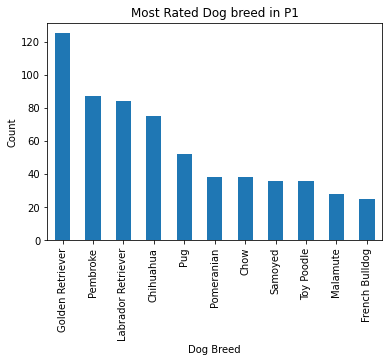

In [205]:
# Histogram of the Most Rated Dog breed in P1
df_dog_breed = df.groupby('p1').filter(lambda x: len(x) >= 25)

df_dog_breed['p1'].value_counts().plot(kind = 'bar')
plt.title('Most Rated Dog breed in P1')
plt.xlabel('Dog Breed')
plt.ylabel('Count');

insight
- We have 369 dog breeds in P1 and Golden Retriever is the most predicted at 125

In [165]:
# P1 breed where prediction true and confidence interval greater than 95%
d1 = df.groupby('p1').filter(lambda x: len(x) >= 1)[['p1','p1_conf','p1_dog']]
d1.loc[(df.p3_conf >= 1.00)]['p1'].value_counts()

Series([], Name: p1, dtype: int64)

In [166]:
# P1 breed where prediction true and confidence interval greater than 95%
d1 = df.groupby('p1').filter(lambda x: len(x) >= 1)[['p1','p1_conf','p1_dog']]
d1.loc[(df.p1_dog == True)&(df.p1_conf >= 0.95)]['p1'].value_counts()

Pembroke                       19
Pug                            19
Samoyed                        17
Golden Retriever               14
Pomeranian                     13
Chihuahua                       9
French Bulldog                  8
Chow                            7
Labrador Retriever              5
Bernese Mountain Dog            4
German Shepherd                 4
Shetland Sheepdog               4
Beagle                          3
Pekinese                        3
Old English Sheepdog            3
Blenheim Spaniel                3
Boston Bull                     2
Cocker Spaniel                  2
English Springer                2
Keeshond                        2
Rottweiler                      2
Malamute                        2
Bull Mastiff                    2
Komondor                        2
Vizsla                          2
Basset                          2
Dalmatian                       2
Shih-Tzu                        2
Great Pyrenees                  1
Miniature Pins

Insight 
- Pembroke & Pug at 19 are the most predicted with 95% confidence interval

In [167]:
# P1 breed where prediction is true
d1 = df.groupby('p1').filter(lambda x: len(x) >= 1)[['p1','p1_conf','p1_dog']]
d1.loc[(d1.p1_dog == True)]['p1'].value_counts()

Golden Retriever      125
Pembroke               87
Labrador Retriever     84
Chihuahua              75
Pug                    52
                     ... 
Scotch Terrier          1
Entlebucher             1
Japanese Spaniel        1
Standard Schnauzer      1
Clumber                 1
Name: p1, Length: 111, dtype: int64

Golden Retriever most predicted at dog breed at 125

In [168]:
# P1 breed where prediction is false
d1 = df.groupby('p1').filter(lambda x: len(x) >= 1)[['p1','p1_conf','p1_dog']]
d1.loc[(df.p1_dog == False)]['p1'].value_counts()

Seat Belt           20
Teddy               17
Web Site            15
Dingo                9
Tennis Ball          9
                    ..
Hammer               1
Nail                 1
Timber Wolf          1
Espresso             1
Desktop Computer     1
Name: p1, Length: 258, dtype: int64

Seat Belt at 20 is the most falsely predicted dog breed.

In [169]:
# P1 breed where all the predictions are true
d1 = df.groupby('p1').filter(lambda x: len(x) >= 1)[['p1','p1_conf','p1_dog','p2','p2_conf','p2_dog','p3','p3_conf','p3_dog']]
d1.loc[(d1.p1_dog == True)&(d1.p2_dog == True)&(d1.p3_dog == True)]['p2'].value_counts()

Labrador Retriever    66
Cardigan              62
Golden Retriever      48
French Bulldog        30
Siberian Husky        30
                      ..
Mexican Hairless       1
Kerry Blue Terrier     1
Standard Schnauzer     1
Giant Schnauzer        1
Komondor               1
Name: p2, Length: 112, dtype: int64

Labrador Retriever (66) and Cardigan(62) are the most predicted in all the image predictions of P1.             

### P2

In [170]:
# Qauntitative analysis of P2
df['p2'].describe()

count                   1908
unique                   391
top       Labrador Retriever
freq                      88
Name: p2, dtype: object

Labrador  Retriever is the most predicted P2 dog breed at 88 amongst 391 unique dog breeds.

In [171]:
## Value counts of P2
df['p2'].value_counts()

Labrador Retriever          88
Cardigan                    72
Golden Retriever            70
Chihuahua                   41
Chesapeake Bay Retriever    39
                            ..
Coffee Mug                   1
Sombrero                     1
Handkerchief                 1
Dandie Dinmont               1
Mud Turtle                   1
Name: p2, Length: 391, dtype: int64

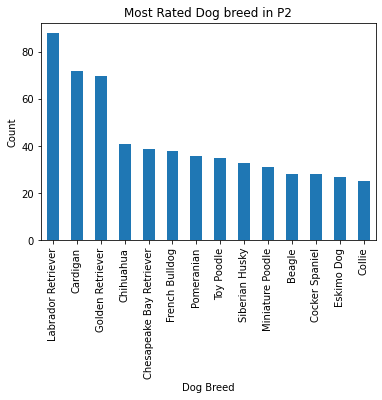

In [206]:
df_dog_breed = df.groupby('p2').filter(lambda x: len(x) >= 25)

df_dog_breed['p2'].value_counts().plot(kind = 'bar')
plt.title('Most Rated Dog breed in P2')
plt.xlabel('Dog Breed')
plt.ylabel('Count');

In [173]:
# P1 breed where prediction true and confidence interval greater than 95%
d1 = df.groupby('p2').filter(lambda x: len(x) >= 1)[['p2','p2_conf','p2_dog']]
d1.loc[(d1.p2_dog == True)&(d1.p2_conf >= 0.95)]['p2'].value_counts()

Series([], Name: p2, dtype: int64)

P2 doesnt have dog breeds with confidnce interval greater tha 95%

In [175]:
# P2 breed where prediction is true
d1 = df.groupby('p2').filter(lambda x: len(x) >= 1)[['p2','p2_conf','p2_dog']]
d1.loc[(df.p2_conf >= 1.00)]['p2'].value_counts()

Series([], Name: p2, dtype: int64)

P2 doesnt have dog breeds with confidnce interval greater tha 100%

In [176]:
# P2 breed where prediction is true
d1 = df.groupby('p2').filter(lambda x: len(x) >= 1)[['p2','p2_conf','p2_dog']]
d1.loc[(d1.p2_dog == True)]['p2'].value_counts()

Labrador Retriever          88
Cardigan                    71
Golden Retriever            70
Chihuahua                   41
Chesapeake Bay Retriever    39
                            ..
Japanese Spaniel             1
Affenpinscher                1
Entlebucher                  1
Bernese Mountain Dog         1
Komondor                     1
Name: p2, Length: 113, dtype: int64

As expected Labrador Retriever is the msot predcited P2 dog breed

In [177]:
# P1 breed where prediction is false
d1 = df.groupby('p2').filter(lambda x: len(x) >= 1)[['p2','p2_conf','p2_dog']]
d1.loc[(df.p2_dog == False)]['p2'].value_counts()

Teddy          11
Doormat        10
Siamese Cat    10
Ice Bear        9
Seat Belt       9
               ..
Minibus         1
Screw           1
Coffee Mug      1
Sombrero        1
Mud Turtle      1
Name: p2, Length: 279, dtype: int64

Teddy(11), Doormat & Siamese Cat both 10 are the most falsely predicted dog breed in P2

In [178]:
# P1 breed where all the predictions are true
d1 = df.groupby('p2').filter(lambda x: len(x) >= 1)[['p1','p1_conf','p1_dog','p2','p2_conf','p2_dog','p3','p3_conf','p3_dog']]
d1.loc[(d1.p1_dog == True)&(d1.p2_dog == True)&(d1.p3_dog == True)]['p2'].value_counts()

Labrador Retriever    66
Cardigan              62
Golden Retriever      48
French Bulldog        30
Siberian Husky        30
                      ..
Mexican Hairless       1
Kerry Blue Terrier     1
Standard Schnauzer     1
Giant Schnauzer        1
Komondor               1
Name: p2, Length: 112, dtype: int64

Labrador Retriever (66) and Cardigan(62) are the most predicted in all the image predictions of P2 same as P1.

### P3

In [179]:
# Qauntitative analysis of P1
df['p3'].describe()

count                   1908
unique                   401
top       Labrador Retriever
freq                      72
Name: p3, dtype: object

Labrador  Retriever is the most predicted P1 dog breed at 72 amongst 401 unique dog breeds.

In [180]:
#len()
df['p3'].value_counts()

Labrador Retriever     72
Chihuahua              56
Golden Retriever       43
Eskimo Dog             34
Kelpie                 31
                       ..
Rotisserie              1
King Penguin            1
Hand Blower             1
American Black Bear     1
Partridge               1
Name: p3, Length: 401, dtype: int64

In [181]:
# Filter values of P1 greater than 25 
df.groupby('p3').filter(lambda x: len(x) >= 25)

,tweet_id,full_text,name,stage,rating_ratio,retweet_count,favorite_count,rating_numerator,rating_denominator,img_num,...,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,date,time,source,jpg_url
2,891815181378084864,This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,Archie,NaN,1.2,3488,22088,12.0,10.0,1,...,Malamute,0.078253,True,Kelpie,0.031379,True,2017-07-31,00:18:03,Twitter for iPhone,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg
7,890729181411237888,When you watch your owner call another dog a good boy but then they turn back to you and say you're a great boy. 13/10 https://t.co/v0nONBcwxq,NaN,NaN,1.3,15784,56913,13.0,10.0,2,...,Eskimo Dog,0.178406,True,Pembroke,0.076507,True,2017-07-28,00:22:40,Twitter for iPhone,https://pbs.twimg.com/media/DFyBahAVwAAhUTd.jpg
9,890240255349198849,This is Cassie. She is a college pup. Studying international doggo communication and stick theory. 14/10 so elegant much sophisticate https://t.co/t1bfwz5S2A,Cassie,doggo,1.4,6108,27989,14.0,10.0,1,...,Cardigan,0.451038,True,Chihuahua,0.029248,True,2017-07-26,15:59:51,Twitter for iPhone,https://pbs.twimg.com/media/DFrEyVuW0AAO3t9.jpg
10,890006608113172480,This is Koda. He is a South Australian deckshark. Deceptively deadly. Frighteningly majestic. 13/10 would risk a petting #BarkWeek https://t.co/dVPW0B0Mme,Koda,NaN,1.3,6159,27075,13.0,10.0,1,...,Pomeranian,0.013884,True,Chow,0.008167,True,2017-07-26,00:31:25,Twitter for iPhone,https://pbs.twimg.com/media/DFnwSY4WAAAMliS.jpg
13,889638837579907072,This is Ted. He does his best. Sometimes that's not enough. But it's ok. 12/10 would assist https://t.co/f8dEDcrKSR,Ted,NaN,1.2,3721,23714,12.0,10.0,1,...,Boxer,0.002129,True,Staffordshire Bullterrier,0.001498,True,2017-07-25,00:10:02,Twitter for iPhone,https://pbs.twimg.com/media/DFihzFfXsAYGDPR.jpg
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1883,666353288456101888,Here we have a mixed Asiago from the Galápagos Islands. Only one ear working. Big fan of marijuana carpet. 8/10 https://t.co/tltQ5w9aUO,NaN,NaN,0.8,58,179,8.0,10.0,1,...,Siberian Husky,0.147655,True,Eskimo Dog,0.093412,True,2015-11-16,20:32:58,Twitter for iPhone,https://pbs.twimg.com/media/CT9cx0tUEAAhNN_.jpg
1884,666345417576210432,Look at this jokester thinking seat belt laws don't apply to him. Great tongue tho 10/10 https://t.co/VFKG1vxGjB,NaN,NaN,1.0,126,246,10.0,10.0,1,...,Chesapeake Bay Retriever,0.054787,True,Labrador Retriever,0.014241,True,2015-11-16,20:01:42,Twitter for iPhone,https://pbs.twimg.com/media/CT9Vn7PWoAA_ZCM.jpg
1896,666071193221509120,Here we have a northern speckled Rhododendron. Much sass. Gives 0 fucks. Good tongue. 9/10 would caress sensually https://t.co/ZoL8kq2XFx,NaN,NaN,0.9,51,127,9.0,10.0,1,...,Yorkshire Terrier,0.174201,True,Pekinese,0.109454,True,2015-11-16,01:52:02,Twitter for iPhone,https://pbs.twimg.com/media/CT5cN_3WEAAlOoZ.jpg
1897,666063827256086533,This is the happiest dog you will ever see. Very committed owner. Nice couch. 10/10 https://t.co/RhUEAloehK,NaN,NaN,1.0,181,400,10.0,10.0,1,...,Tibetan Mastiff,0.093718,True,Labrador Retriever,0.072427,True,2015-11-16,01:22:45,Twitter for iPhone,https://pbs.twimg.com/media/CT5Vg_wXIAAXfnj.jpg


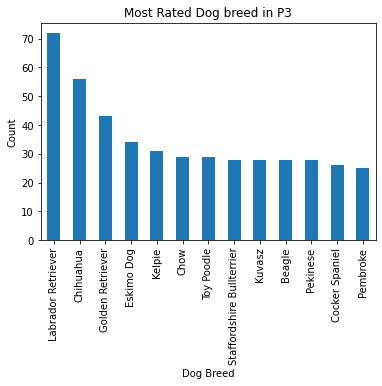

In [207]:
df_dog_breed = df.groupby('p3').filter(lambda x: len(x) >= 25)

df_dog_breed['p3'].value_counts().plot(kind = 'bar')
plt.title('Most Rated Dog breed in P3')
plt.xlabel('Dog Breed')
plt.ylabel('Count');

In [183]:
# P1 breed where prediction true and confidence interval greater than 95%
d1 = df.groupby('p3').filter(lambda x: len(x) >= 1)[['p3','p3_conf','p3_dog']]
d1.loc[(df.p3_dog == True)&(df.p3_conf >= 0.95)]['p3'].value_counts()

Series([], Name: p3, dtype: int64)

P3 doesnt have dog breeds with confidence interval greater tha 95%

In [184]:
# P1 breed where prediction true and confidence interval greater than 95%
d1 = df.groupby('p3').filter(lambda x: len(x) >= 1)[['p3','p3_conf','p3_dog']]
d1.loc[(df.p3_conf >= 1.00)]['p3'].value_counts()

Series([], Name: p3, dtype: int64)

P3 doesnt have dog breeds with confidnce interval greater than 100%

In [185]:
# P1 breed where prediction is true
d1 = df.groupby('p3').filter(lambda x: len(x) >= 1)[['p3','p3_conf','p3_dog']]
d1.loc[(d1.p3_dog == True)]['p3'].value_counts()

Labrador Retriever    72
Chihuahua             56
Golden Retriever      43
Eskimo Dog            34
Kelpie                31
                      ..
Briard                 2
Sussex Spaniel         1
Affenpinscher          1
Standard Schnauzer     1
Kerry Blue Terrier     1
Name: p3, Length: 116, dtype: int64

As expected Labrador Retriever is the msot predcited P3 dog breed

In [186]:
# P1 breed where prediction is false
d1 = df.groupby('p3').filter(lambda x: len(x) >= 1)[['p3','p3_conf','p3_dog']]
d1.loc[(df.p3_dog == False)]['p3'].value_counts()

Dingo                  15
Doormat                12
Siamese Cat            12
Teddy                  11
Seat Belt              11
                       ..
Hand Blower             1
American Black Bear     1
Viaduct                 1
Spatula                 1
Partridge               1
Name: p3, Length: 285, dtype: int64

Dingo(15), Doormat & Siamese Cat both 12 are the most falsely predicted dog breed in P3

In [187]:
# P1 breed where all the predictions are true
d1 = df.groupby('p3').filter(lambda x: len(x) >= 1)[['p1','p1_conf','p1_dog','p2','p2_conf','p2_dog','p3','p3_conf','p3_dog']]
d1.loc[(d1.p1_dog == True)&(d1.p2_dog == True)&(d1.p3_dog == True)]['p3'].value_counts()

Labrador Retriever      59
Chihuahua               47
Golden Retriever        31
Eskimo Dog              30
Pekinese                26
                        ..
Bernese Mountain Dog     1
Standard Schnauzer       1
Kerry Blue Terrier       1
Komondor                 1
Affenpinscher            1
Name: p3, Length: 116, dtype: int64

Labrador Retriever (59) and Chihuahua (47) are the most predicted in all the image predictions of P3

In [188]:
# Qauntitative analysis of P1,P2,P3
df.loc[:,['p1','p2','p3']].describe()

,p1,p2,p3
count,1908,1908,1908
unique,369,391,401
top,Golden Retriever,Labrador Retriever,Labrador Retriever
freq,125,88,72


### Insight
Golden Retriever is the most predicted dog breed. The model is goood at predicting Golden Retriever images.

In [189]:
# Qauntitative analysis of P1,P2,P3
df.loc[:,['p1_conf','p2_conf','p3_conf']].describe()

,p1_conf,p2_conf,p3_conf
count,1908.000000,1.908000e+03,1.908000e+03
mean,0.592905,1.343463e-01,6.025894e-02
std,0.273197,1.006359e-01,5.095809e-02
min,0.044333,1.011300e-08,1.740170e-10
25%,0.359779,5.419487e-02,1.609287e-02
50%,0.587222,1.172595e-01,4.967815e-02
75%,0.847063,1.948745e-01,9.157912e-02
max,1.000000,4.880140e-01,2.734190e-01


In [190]:
# P1 breed where confidence interval is greater pr equal to 1
d1 = df.groupby('p1').filter(lambda x: len(x) >= 1)[['p1','p1_conf','p1_dog']]
d1.loc[(df.p1_conf >= 1.00)]['p1'].value_counts()

Jigsaw Puzzle    1
Name: p1, dtype: int64

In [191]:
df[df['p1_conf'] >= 1.00][['p1','p1_conf','p1_dog']]

,p1,p1_conf,p1_dog
1804,Jigsaw Puzzle,1.0,False


In [192]:
df[df['p2_conf'] >= 1.00][['p2','p2_conf','p2_dog']]

,p2,p2_conf,p2_dog


In [193]:
df[df['p3_conf'] >= 1.00][['p3','p3_conf','p3_dog']]

,p3,p3_conf,p3_dog


In [194]:
df[df['p1_conf'] >= 1.00]

,tweet_id,full_text,name,stage,rating_ratio,retweet_count,favorite_count,rating_numerator,rating_denominator,img_num,...,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,date,time,source,jpg_url
1804,667866724293877760,This is Shaggy. He knows exactly how to solve the puzzle but can't talk. All he wants to do is help. 10/10 great guy https://t.co/SBmWbfAg6X,Shaggy,NaN,1.0,902,2722,10.0,10.0,1,...,Prayer Rug,1.011300e-08,False,Doormat,1.740170e-10,False,2015-11-21,00:46:50,Twitter for iPhone,https://pbs.twimg.com/media/CUS9PlUWwAANeAD.jpg


### Insight

Jigsaw Puzzle was the onl;y breed in the image predctions to score 100% confidence interval, unfortunately the predcitor was wrong. Showing we cant rely on 100% confidence interval to use in our prediction.

In [196]:
df['p1_conf'].describe()

count    1908.000000
mean        0.592905
std         0.273197
min         0.044333
25%         0.359779
50%         0.587222
75%         0.847063
max         1.000000
Name: p1_conf, dtype: float64

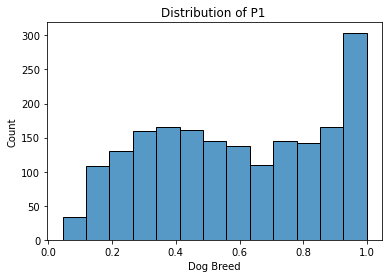

In [201]:
g = sns.histplot(df, x="p1_conf")
plt.title('Distribution of P1 ')
plt.xlabel('Dog Breed')
plt.ylabel('Count');

P1 confidence interval distribution shows a normal distribution from 0% to 70% before sharply skewing to the left. There is a lot of high confidnce interval values in the P1 prediction. The model used was confident in the image predictions.

In [197]:
df['p2_conf'].describe()

count    1.908000e+03
mean     1.343463e-01
std      1.006359e-01
min      1.011300e-08
25%      5.419487e-02
50%      1.172595e-01
75%      1.948745e-01
max      4.880140e-01
Name: p2_conf, dtype: float64

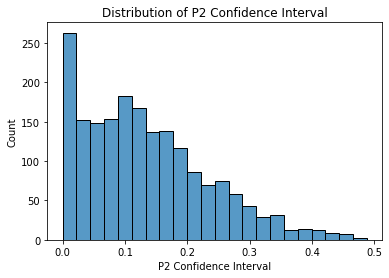

In [202]:
g = sns.histplot(df, x="p2_conf")
plt.title('Distribution of P2 Confidence Interval')
plt.xlabel('P2 Confidence Interval')
plt.ylabel('Count');

P2 confidence interval distribution shows a right skewed distribution. This is due toa lot of low confidnce interval values in the P2 prediction. The model used was not confident in the image predictions with almost all the prediction below 50% confidence interval.  

In [203]:
df['p3_conf'].describe()

count    1.908000e+03
mean     6.025894e-02
std      5.095809e-02
min      1.740170e-10
25%      1.609287e-02
50%      4.967815e-02
75%      9.157912e-02
max      2.734190e-01
Name: p3_conf, dtype: float64

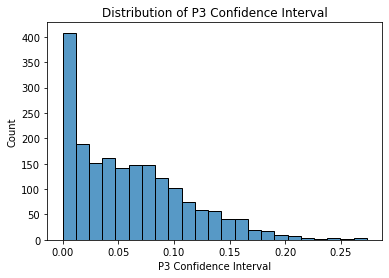

In [204]:
g = sns.histplot(df, x="p3_conf")
plt.title('Distribution of P3 Confidence Interval')
plt.xlabel('P3 Confidence Interval')
plt.ylabel('Count');

P3 confidence interval distribution shows a right skewed distribution same as P2. This is due to a lot of low confidence interval values in the P3 prediction. The model used was not confident in the image predictions with almost all the prediction below 25% confidence interval.

### Insight : The model used  was most confident of P1 image predictions.

## Analysis 2
### retweets and likes

In [229]:
# retweet vs likes
df.loc[:,['retweet_count','favorite_count']].describe()

,retweet_count,favorite_count
count,1908.000000,1908.000000
mean,2049.387317,7226.901468
std,3629.863505,10658.512672
min,11.000000,66.000000
25%,481.750000,1565.000000
50%,1034.500000,3304.500000
75%,2339.500000,8778.000000
max,70907.000000,145012.000000


- The minimum retweets(retweet_count) received by a tweet is 11 with maximum being 70907 
- The minimum likes(favorite_count) received by a tweet is 66 with maximum being 145012

The average retweets 2049 and likes is 7227.The likes average is higher because people are likely to like a picture than retweet it. 

The average for both retweets and likes is greater than their median values 1035 and 3305 respectively.This will  cause the distribution of these variables to skew to the right.

In [233]:
df[df['retweet_count'] == 11 ]

,tweet_id,full_text,name,stage,rating_ratio,retweet_count,favorite_count,rating_numerator,rating_denominator,img_num,...,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,date,time,source,jpg_url
1891,666102155909144576,Oh my. Here you are seeing an Adobe Setter giving birth to twins!!! The world is an amazing place. 11/10 https://t.co/11LvqN4WLq,NaN,NaN,1.1,11,66,11.0,10.0,1,...,Newfoundland,0.149842,True,Borzoi,0.133649,True,2015-11-16,03:55:04,Twitter for iPhone,https://pbs.twimg.com/media/CT54YGiWUAEZnoK.jpg


In [234]:
df[df['retweet_count'] == 70907 ]

,tweet_id,full_text,name,stage,rating_ratio,retweet_count,favorite_count,rating_numerator,rating_denominator,img_num,...,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,date,time,source,jpg_url
724,744234799360020481,Here's a doggo realizing you can stand in a pool. 13/10 enlightened af (vid by Tina Conrad) https://t.co/7wE9LTEXC4,NaN,doggo,1.3,70907,145012,13.0,10.0,1,...,Ice Bear,0.044681,False,Whippet,0.018442,True,2016-06-18,18:26:18,Twitter for iPhone,https://pbs.twimg.com/ext_tw_video_thumb/744234667679821824/pu/img/1GaWmtJtdqzZV7jy.jpg


In [235]:
df[df['favorite_count'] == 66 ]

,tweet_id,full_text,name,stage,rating_ratio,retweet_count,favorite_count,rating_numerator,rating_denominator,img_num,...,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,date,time,source,jpg_url
1891,666102155909144576,Oh my. Here you are seeing an Adobe Setter giving birth to twins!!! The world is an amazing place. 11/10 https://t.co/11LvqN4WLq,NaN,NaN,1.1,11,66,11.0,10.0,1,...,Newfoundland,0.149842,True,Borzoi,0.133649,True,2015-11-16,03:55:04,Twitter for iPhone,https://pbs.twimg.com/media/CT54YGiWUAEZnoK.jpg


In [236]:
df[df['favorite_count'] == 	145012 ]

,tweet_id,full_text,name,stage,rating_ratio,retweet_count,favorite_count,rating_numerator,rating_denominator,img_num,...,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,date,time,source,jpg_url
724,744234799360020481,Here's a doggo realizing you can stand in a pool. 13/10 enlightened af (vid by Tina Conrad) https://t.co/7wE9LTEXC4,NaN,doggo,1.3,70907,145012,13.0,10.0,1,...,Ice Bear,0.044681,False,Whippet,0.018442,True,2016-06-18,18:26:18,Twitter for iPhone,https://pbs.twimg.com/ext_tw_video_thumb/744234667679821824/pu/img/1GaWmtJtdqzZV7jy.jpg


### Insight
The tweet than recieved the most retweets also received the most likes (tweet id - 744234799360020481  https://t.co/7wE9LTEXC4) and the reverse is also true for least( tweet id - 	666102155909144576 https://t.co/11LvqN4WLq). The most liked and retweeted photo did not recieve the highest rating than the least liked and retweeted.

In [238]:
# Removing outliers using the IQR method
percentile_25 = df.retweet_count.quantile(0.25)
percentile_75 = df.retweet_count.quantile(0.75)

iqr = percentile_75 - percentile_25
# lower outlier
low_outlier1 = percentile_25 - (1.5 * iqr)
# high outlier
high_outlier1 = percentile_75 + (1.5 * iqr)
iqr,low_outlier1,high_outlier1

(1857.75, -2304.875, 5126.125)

In [240]:
len(df[df['retweet_count'] < low_outlier1])

0

In [241]:
len(df[df['retweet_count'] > high_outlier1])

156

retweet count has 156 outliers

In [248]:
# Removing outliers using the IQR method
percentile_25 = df.favorite_count.quantile(0.25)
percentile_75 = df.favorite_count.quantile(0.75)

iqr = percentile_75 - percentile_25
# lower outlier
low_outlier2 = percentile_25 - (1.5 * iqr)
# high outlier
high_outlier2 = percentile_75 + (1.5 * iqr)
iqr,low_outlier2,high_outlier2

(7213.0, -9254.5, 19597.5)

In [253]:
len(df[df['favorite_count'] < low_outlier2])

0

In [254]:
len(df[df['favorite_count'] > high_outlier2])

177

favorite count has 177 outliers

In [237]:
# Removing outliers using the IQR method
percentile_25 = df.favorite_count.quantile(0.25)
percentile_75 = df.favorite_count.quantile(0.75)

iqr = percentile_75 - percentile_25
# lower outlier
low_outlier = percentile_25 - (1.5 * iqr)
# high outlier
high_outlier = percentile_75 + (1.5 * iqr)
iqr,low_outlier,high_outlier

(7213.0, -9254.5, 19597.5)

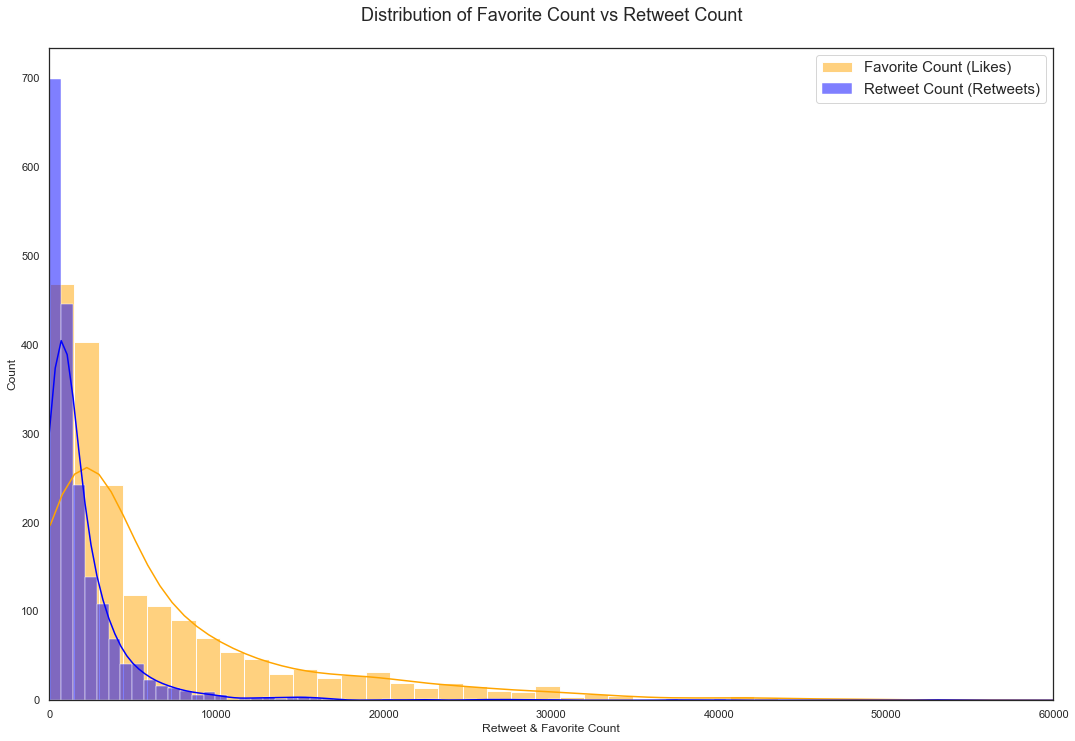

In [349]:
# Histogram of favorite_count and retweet_count
plt.figure(figsize=(18,12))
ax = sns.histplot(data=df,x='favorite_count',kde=True, color = "orange", bins=100, label='Favorite Count (Likes)')
ax = sns.histplot(data=df,x='retweet_count',kde=True, color = "blue", bins=100, label='Retweet Count (Retweets)')
ax.set_xlabel('Retweet & Favorite Count')
ax.set_ylabel('Count')
plt.title('Distribution of Favorite Count vs Retweet Count\n', size = 18)
plt.legend(loc='upper right', fontsize = 15)
plt.xlim(0,60000)
plt.show();

Looking at both the histograms of favorite_count and retweet_count, they are both skewed to the right mean that there is a large concentration of lower bound values and the existence of outliers as analysed above. 

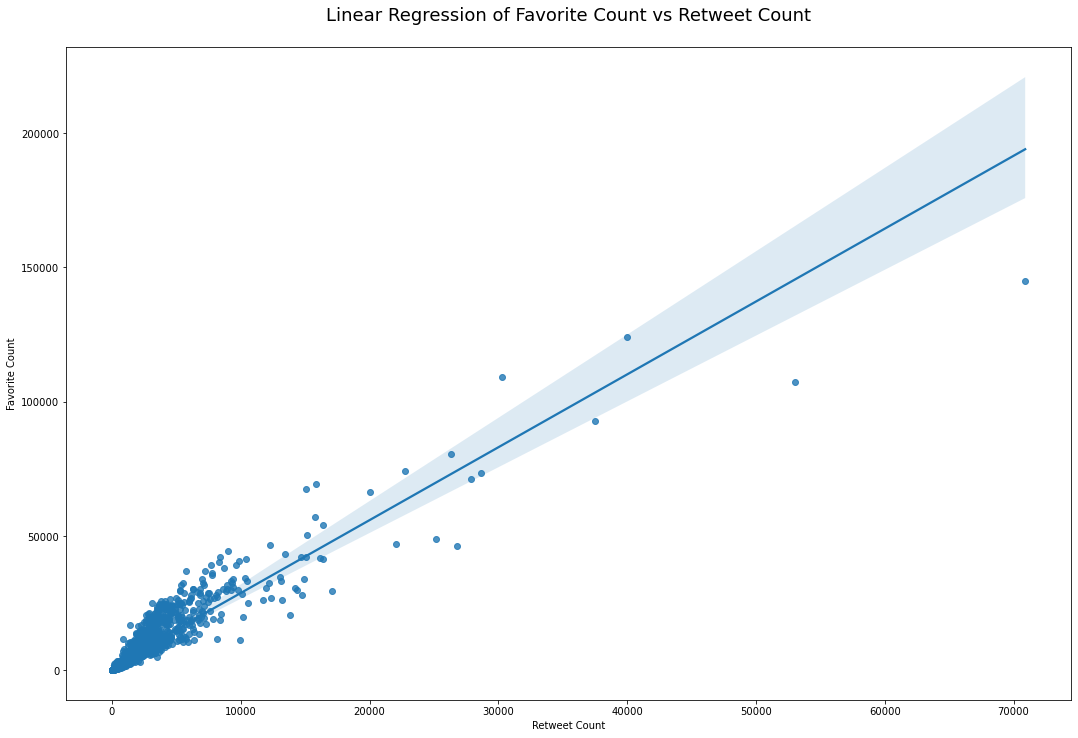

In [270]:
# Regression plot of retweet count and favorite count
fig, ax = plt.subplots(figsize=(11,12))
sns.regplot(data=df,x='retweet_count',y='favorite_count')
ax.set_xlabel('Retweet Count')
ax.set_ylabel('Favorite Count')
plt.title('Linear Regression of Favorite Count vs Retweet Count\n', size = 18)
plt.show()

### Insight
There is a positive relationship between Retweet_count & Favorite_count. This means that as Retweet_count increases,Favorite_count also increase. This is likely due to the fact that poeple who like tweets are more likely to retweets that tweet. There is also some existence of outliers as mentioned before(above) they might need to be dealt with if planning of building a model building as they have the abilty to skew results. 

## Analysis 3
### Ratings Extreme Outliers

In [301]:
df.rating_ratio.describe()

count    1908.000000
mean        1.164873
std         4.154405
min         0.000000
25%         1.000000
50%         1.100000
75%         1.200000
max       177.600000
Name: rating_ratio, dtype: float64

In [302]:
df.rating_ratio.value_counts().sort_index()

0.000        2
0.100        4
0.200        9
0.300       19
0.400       14
0.500       32
0.600       32
0.700       51
0.800       95
0.900      151
0.975        1
1.000      410
1.100      381
1.126        1
1.127        1
1.200      429
1.300      240
1.350        1
1.400       33
42.000       1
177.600      1
Name: rating_ratio, dtype: int64

In [303]:
# Removing outliers using the IQR method
percentile_25 = df.rating_ratio.quantile(0.25)
percentile_75 = df.rating_ratio.quantile(0.75)

iqr = percentile_75 - percentile_25
# lower outlier
low_outlier = percentile_25 - (1.5 * iqr)
# high outlier
high_outlier = percentile_75 + (1.5 * iqr)
iqr,low_outlier,high_outlier

(0.19999999999999996, 0.7000000000000001, 1.5)

lowest outlier rating = 0.7 and highest outlier rating = 1.5 

In [304]:
len(df[df['rating_ratio'] < low_outlier])

163

In [305]:
len(df[df['rating_ratio'] > high_outlier])

2

In [306]:
df[df['rating_ratio'] > high_outlier]

,tweet_id,full_text,name,stage,rating_ratio,retweet_count,favorite_count,rating_numerator,rating_denominator,img_num,...,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,date,time,source,jpg_url
675,749981277374128128,This is Atticus. He's quite simply America af. 1776/10 https://t.co/GRXwMxLBkh,Atticus,NaN,177.6,2281,4791,1776.0,10.0,1,...,Sunglasses,0.080822,False,Sunglass,0.050776,False,2016-07-04,15:00:45,TweetDeck,https://pbs.twimg.com/media/CmgBZ7kWcAAlzFD.jpg
1635,670842764863651840,After so many requests... here you go.\n\nGood dogg. 420/10 https://t.co/yfAAo1gdeY,NaN,NaN,42.0,7592,22111,420.0,10.0,1,...,Accordion,0.094075,False,Drumstick,0.061113,False,2015-11-29,05:52:33,Twitter for iPhone,https://pbs.twimg.com/media/CU9P717W4AAOlKx.jpg


In [307]:
outliers = len(df[df['rating_ratio'] < low_outlier]) + len(df[df['rating_ratio'] > high_outlier])
outliers

165

In [308]:
total = len(df['rating_ratio'])
total

1908

In [309]:
# Percentage of outliers 
outliers/total *100

8.647798742138365

9 % of the ratings are outliers, this a significant number of observations to drop them all. 

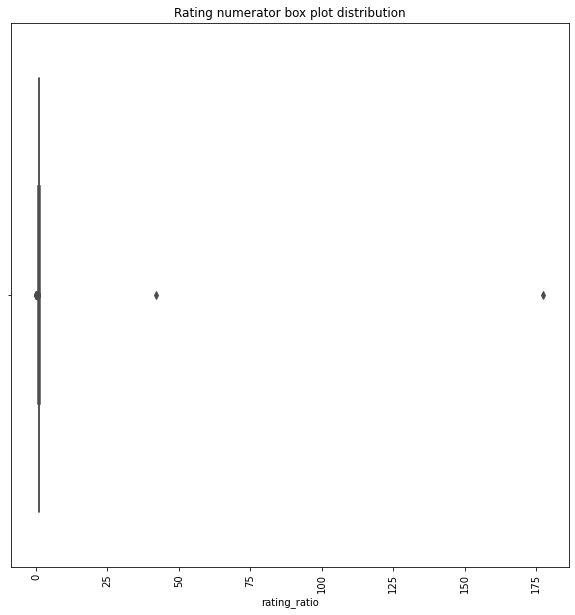

In [310]:
# boxplot for rating numerator
plt.figure(figsize=(10,10))
plt.xticks(rotation=90)
g = sns.boxplot(x=df.rating_ratio)
g.set(title='Rating numerator box plot distribution');

The box plot distribution is right skewed due to high volume of low values. we notice two extreme outliers of 420 and 1776. We are going to drop these extreme outliers to get a better idea of the distribution as they tend to skew the distribution in their direction.

In [311]:
df.rating_ratio.describe()

count    1908.000000
mean        1.164873
std         4.154405
min         0.000000
25%         1.000000
50%         1.100000
75%         1.200000
max       177.600000
Name: rating_ratio, dtype: float64

In [314]:
# dropping the extreme outliers
#df1.drop(df1[df1['rating_numerator'] < low_outlier].index, inplace = True)
df.drop(df[df['rating_ratio'] > high_outlier].index, inplace = True)

In [315]:
df.rating_ratio.describe()

count    1906.00000
mean        1.05088
std         0.21909
min         0.00000
25%         1.00000
50%         1.10000
75%         1.20000
max         1.40000
Name: rating_ratio, dtype: float64

Mean of ratings is 1.05 approximately 1.1 and median of 1.1 showing that the distribution is now normally distributed with minimum of 0 and maximum rating of 14

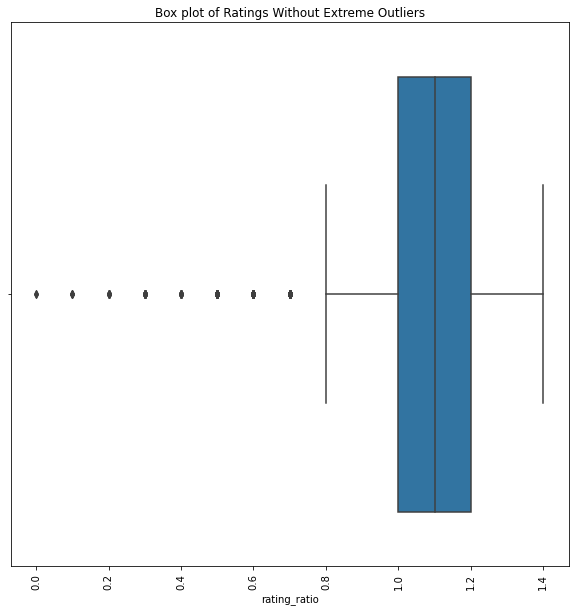

In [316]:
# boxplot for age
plt.figure(figsize=(10,10))
plt.xticks(rotation=90)
p = sns.boxplot(x=df.rating_ratio )
p.set(title='Box plot of Ratings Without Extreme Outliers')
plt.show()

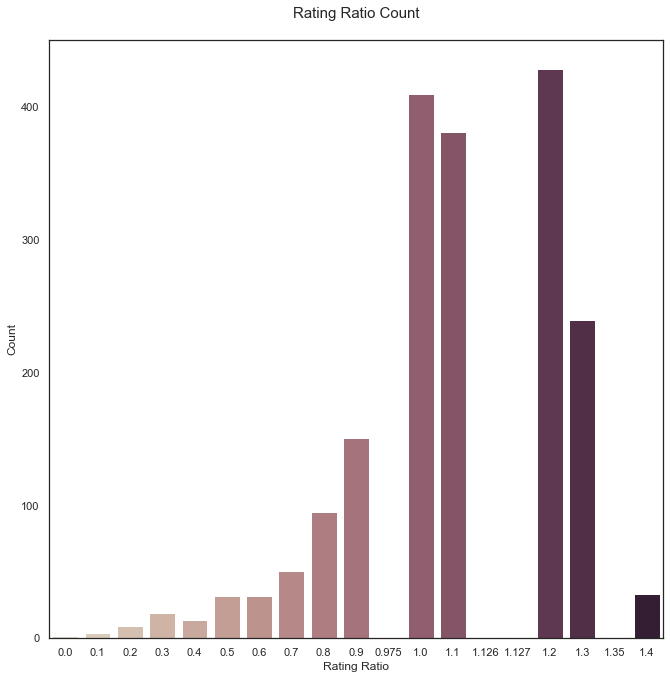

In [347]:
plt.figure(figsize=(11,11))
p = sns.countplot(data=df, x='rating_ratio', palette = "ch:.25")
p.set_xlabel('Rating Ratio')
p.set_ylabel('Count')
plt.title('Rating Ratio Count\n', size = 15)
plt.show()

Ratings 1.0 and 1.2 are the most popular ratings

## Analysis 4
### Ratings vs Retweets and Likes

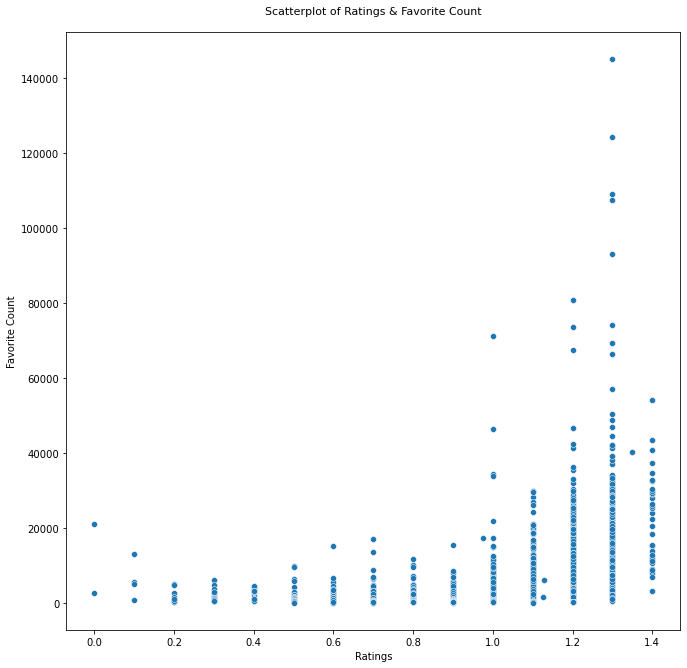

In [323]:
plt.figure(figsize=(11,11))
a = sns.scatterplot(data=df,x='rating_ratio',y='favorite_count')
a.set_xlabel('Ratings')
a.set_ylabel('Favorite Count')
plt.title('Scatterplot of Ratings & Favorite Count\n', size = 11)
plt.show();

The lowest rated tweets recieved the lowest likes and 1.3 is the most liked rating. 

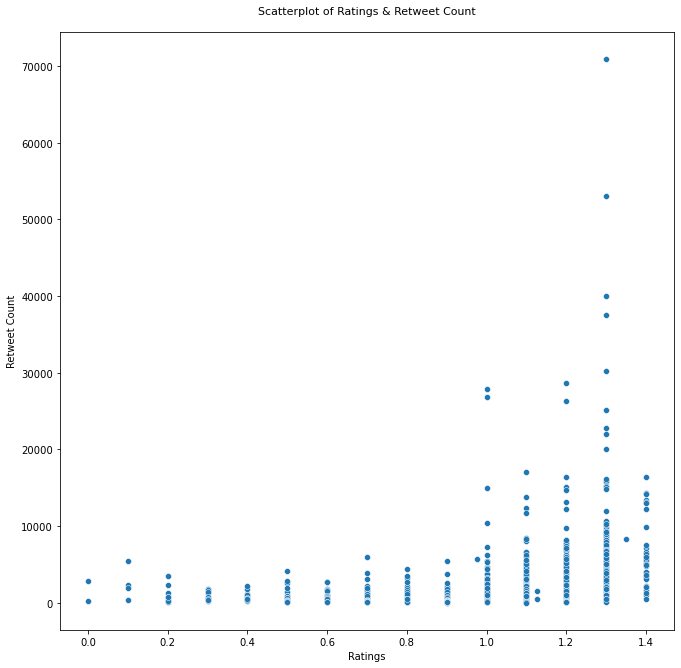

In [324]:
plt.figure(figsize=(11,11))
b = sns.scatterplot(data=df,x='rating_ratio',y='retweet_count')
b.set_xlabel('Ratings')
b.set_ylabel('Retweet Count')
plt.title('Scatterplot of Ratings & Retweet Count\n', size = 11)
plt.show();

The lowest rated tweets recieved the lowest retweets and 1.3 is the most retweeted rating.

### Insight
The lowest rated tweets recieved the lowest likes and retweets and 1.3 is the most liked and retweeted rating. 

## Analysis 5 
### source and ratings ,retweets and likes

In [327]:
df.source.value_counts()

Twitter for iPhone    1871
Twitter Web Client      26
TweetDeck                9
Name: source, dtype: int64

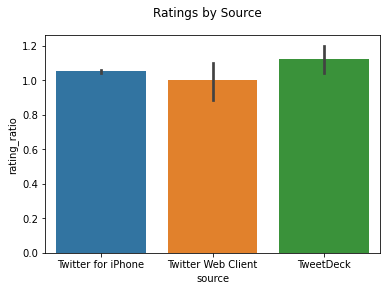

In [328]:
p=sns.barplot(data=df, x='source', y='rating_ratio')
p.figure.suptitle('Ratings by Source');

All sources of tweets are likely to get above 10 rating on average.

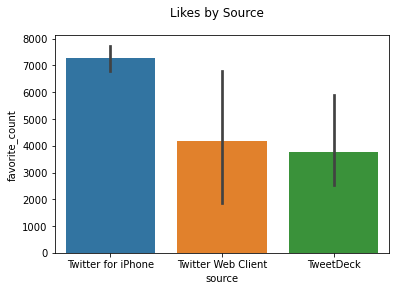

In [329]:
p=sns.barplot(data=df, x='source', y='favorite_count')
p.figure.suptitle('Likes by Source');

Twitter by Iphone users are likely to get likes (favorite) on their tweets with the avearge being around 7000 likes.

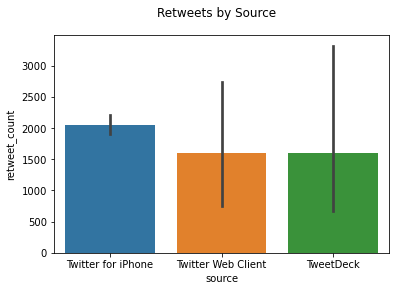

In [330]:
p=sns.barplot(data=df, x='source', y='retweet_count')
p.figure.suptitle('Retweets by Source');

Twitter by Iphone users are likely to get retweets on their tweets with the avearge being around 2000 retweets.

### Insight
Twitter by Iphone users are likely to get retweets and likes on their tweets.

## Analysis 6
### Correlations (Heatmap)

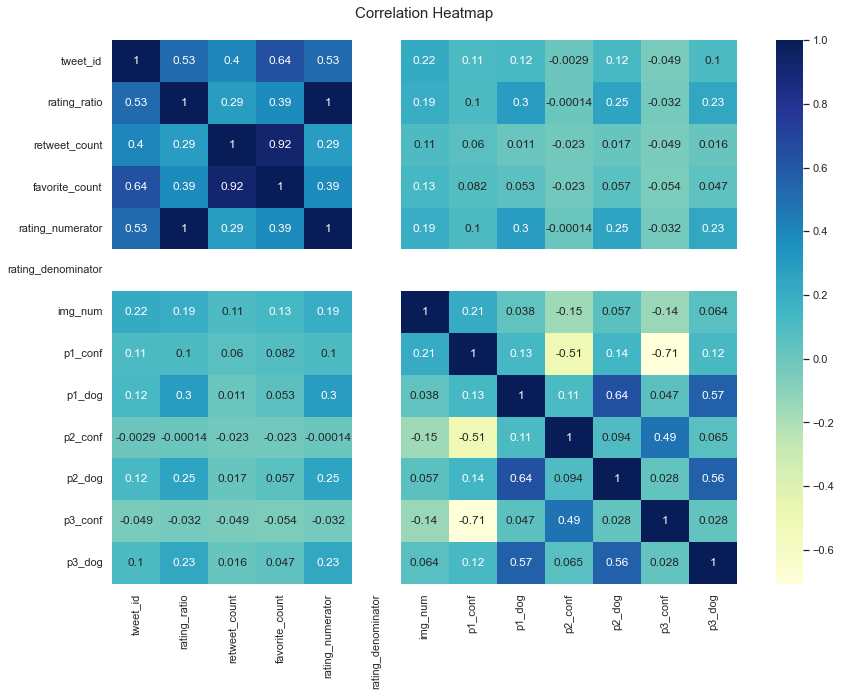

In [342]:
# plotting correlation heatmap of the whole dataset
plt.figure(figsize=(14,10))
sns.set(style='white')
dataplot = sns.heatmap(df.corr(), cmap="YlGnBu", annot=True)
plt.title('Correlation Heatmap\n', size = 15)
plt.show()

### Insight 
- rating_ratio and ratio_numerator have a correlation of 1 because one is based on another.
- There is a strong positive correlation between retweet_count and favorite_count (0.92)
- There is negative correlation between p1_conf and both p2_conf (-0.51) nad p3_conf (-0.71), this might be due to prediction model having a high confidence in P1 results compared to P2 and P3 results.